In [42]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\clint\Desktop\Lifecycle Code\data\csv_data\graph2table\combined_data.csv"

# Read the CSV file
data = pd.read_csv(file_path)

data

Date    4YO    5YO  3-5YO Avg.  Source_File       3YO  2YO
0     2015-01-01  78000  70000     83000.0  02_2018.csv       NaN  NaN
1     2015-01-01  78000  69000     80000.0  05_2018.csv       NaN  NaN
2     2015-01-01  78000  70000     80000.0  07_2018.csv       NaN  NaN
3     2015-01-01  76000  68000     80000.0  04_2018.csv       NaN  NaN
4     2015-01-01  77000  69000     78000.0  08_2018.csv       NaN  NaN
...          ...    ...    ...         ...          ...       ...  ...
2135  2024-07-01  65000  50000         NaN  01_2025.csv   96000.0  NaN
2136  2024-07-01  71000  50000         NaN   8_2024.csv   92000.0  NaN
2137  2024-07-01  68000  52000         NaN   9_2024.csv  100000.0  NaN
2138  2024-09-01  62000  45000         NaN  01_2025.csv   94000.0  NaN
2139  2024-11-01  59000  43000         NaN  01_2025.csv   85000.0  NaN

[2140 rows x 7 columns]

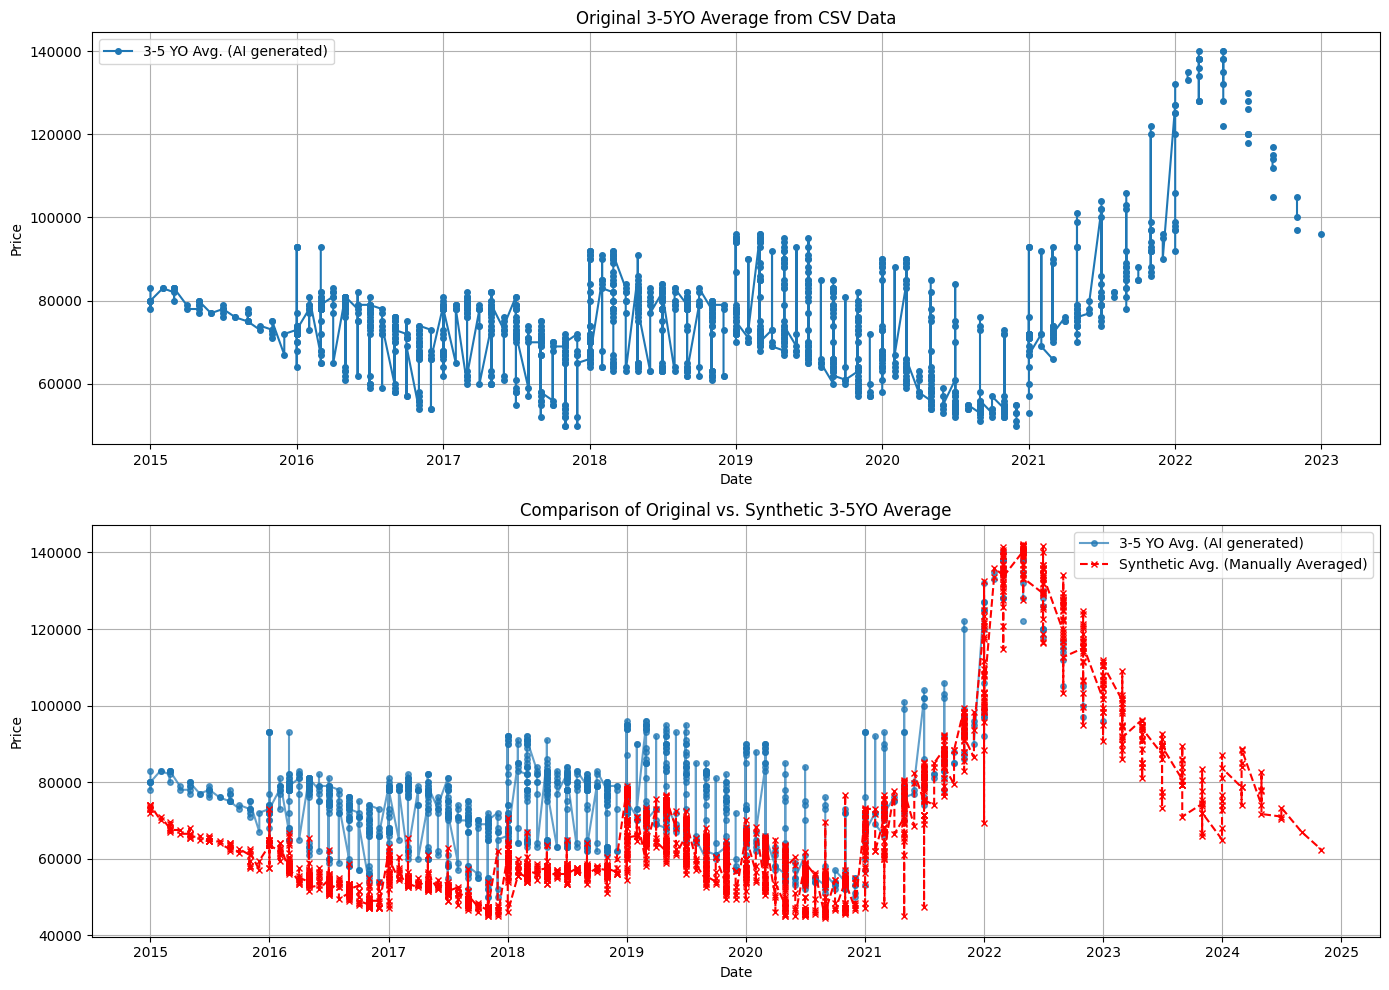

Number of rows where both original and synthetic averages are available: 1546
Mean difference between original and synthetic averages: 14181.00
Correlation between original and synthetic averages: 0.7117


In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create synthetic 3-5YO average by averaging the 3YO, 4YO, and 5YO columns row by row
# First, calculate the synthetic average where all three columns have values
data['Synthetic Avg'] = data[['3YO', '4YO', '5YO']].mean(axis=1, skipna=False)  # skipna=False to get NaN if any value is missing

# For rows where only 4YO and 5YO are available, calculate average of those two
mask = data['3YO'].isna() & data['4YO'].notna() & data['5YO'].notna()
data.loc[mask, 'Synthetic Avg'] = data.loc[mask, ['4YO', '5YO']].mean(axis=1)

# Sort data by date
data_sorted = data.sort_values('Date')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Original 3-5YO Avg. column
ax1.plot(data_sorted['Date'], data_sorted['3-5YO Avg.'], label='3-5 YO Avg. (AI generated)', marker='o', linestyle='-', markersize=4)
ax1.set_title('Original 3-5YO Average from CSV Data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.legend()

# Plot 2: Compare the original average with our synthetic average
ax2.plot(data_sorted['Date'], data_sorted['3-5YO Avg.'], label='3-5 YO Avg. (AI generated)', marker='o', linestyle='-', markersize=4, alpha=0.7)
ax2.plot(data_sorted['Date'], data_sorted['Synthetic Avg'], label='Synthetic Avg. (Manually Averaged)', marker='x', linestyle='--', markersize=4, color='red')
ax2.set_title('Comparison of Original vs. Synthetic 3-5YO Average')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Compare where both values are available
valid_comparison = data.dropna(subset=['3-5YO Avg.', 'Synthetic Avg'])
print(f"Number of rows where both original and synthetic averages are available: {len(valid_comparison)}")
if len(valid_comparison) > 0:
    mean_diff = np.mean(valid_comparison['3-5YO Avg.'] - valid_comparison['Synthetic Avg'])
    print(f"Mean difference between original and synthetic averages: {mean_diff:.2f}")
    
    # Calculate correlation
    correlation = valid_comparison['3-5YO Avg.'].corr(valid_comparison['Synthetic Avg'])
    print(f"Correlation between original and synthetic averages: {correlation:.4f}")

In [44]:
# Let's examine the rows where there are discrepancies between the original and synthetic averages
valid_comparison = data.dropna(subset=['3-5YO Avg.', 'Synthetic Avg']).copy()
valid_comparison['Difference'] = valid_comparison['3-5YO Avg.'] - valid_comparison['Synthetic Avg']

# Find rows with large differences
threshold = 5000  # Define what constitutes a significant difference
large_diff_rows = valid_comparison[abs(valid_comparison['Difference']) > threshold]

if len(large_diff_rows) > 0:
    print(f"Found {len(large_diff_rows)} rows with differences larger than {threshold}:")
    display(large_diff_rows[['Date', '3YO', '4YO', '5YO', '3-5YO Avg.', 'Synthetic Avg', 'Difference', 'Source_File']].sort_values(by='Difference', ascending=False))
else:
    print("No significant discrepancies found between original and synthetic averages.")
    
# Show some statistical summary of the differences
print("\nStatistics of differences:")
display(valid_comparison['Difference'].describe())

Found 1211 rows with differences larger than 5000:


Date       3YO     4YO     5YO  3-5YO Avg.  Synthetic Avg  \
1496 2020-07-01       NaN   51000   40000     84000.0   45500.000000   
1376 2020-03-01       NaN   64000   41000     90000.0   52500.000000   
589  2018-01-01       NaN   69000   40000     92000.0   54500.000000   
1348 2020-03-01       NaN   63000   42000     90000.0   52500.000000   
1353 2020-03-01       NaN   62000   42000     89000.0   52000.000000   
...         ...       ...     ...     ...         ...            ...   
1780 2021-07-01  105000.0   77000   60000     74000.0   80666.666667   
1829 2021-11-01  120000.0   88000   72000     86000.0   93333.333333   
1910 2022-03-01  154000.0  140000  112000    128000.0  135333.333333   
1816 2021-09-01  110000.0   82000   65000     78000.0   85666.666667   
2039 2023-01-01  130000.0  105000   78000     96000.0  104333.333333   

        Difference  Source_File  
1496  38500.000000  09_2020.csv  
1376  37500.000000  09_2020.csv  
589   37500.000000  08_2020.csv  
1348  37500.000000  11_2020.csv  
1353  37000.000000  05_2020.csv  
...            ...          ...  
1780  -6666.666667  02_2023.csv  
1829  -7333.333333  02_2023.csv  
1910  -7333.333333  12_2022.csv  
1816  -7666.666667  02_2023.csv  
2039  -8333.333333  02_2023.csv  

[1211 rows x 8 columns]


Statistics of differences:


count     1546.000000
mean     14181.004743
std      10654.471148
min      -8333.333333
25%       6000.000000
50%      13500.000000
75%      23000.000000
max      38500.000000
Name: Difference, dtype: float64

In [45]:
# Let's check how the 3-5YO Avg. is calculated in the original data
# First, let's sample some rows where all values are present
sample_rows = data.dropna(subset=['3YO', '4YO', '5YO', '3-5YO Avg.']).sample(min(10, len(data.dropna(subset=['3YO', '4YO', '5YO', '3-5YO Avg.']))))

# Add a column with our calculated average
sample_rows['Manual Avg'] = (sample_rows['3YO'] + sample_rows['4YO'] + sample_rows['5YO']) / 3
sample_rows['3+4+5/3 = Orig?'] = np.isclose(sample_rows['Manual Avg'], sample_rows['3-5YO Avg.'], rtol=0.01)

# Display the results
print("Sample rows to check how 3-5YO Avg. might be calculated:")
display(sample_rows[['Date', '3YO', '4YO', '5YO', '3-5YO Avg.', 'Manual Avg', '3+4+5/3 = Orig?', 'Source_File']])

# Check if there might be different weights
def weighted_avg(row, weights):
    return (row['3YO'] * weights[0] + row['4YO'] * weights[1] + row['5YO'] * weights[2]) / sum(weights)

# Try different weight combinations
weight_options = [
    (1, 1, 1),  # Equal weights
    (2, 1, 1),  # More weight on 3YO
    (1, 2, 1),  # More weight on 4YO
    (1, 1, 2)   # More weight on 5YO
]

for weights in weight_options:
    sample_rows[f'Weighted Avg {weights}'] = sample_rows.apply(lambda row: weighted_avg(row, weights), axis=1)
    sample_rows[f'{weights} = Orig?'] = np.isclose(sample_rows[f'Weighted Avg {weights}'], sample_rows['3-5YO Avg.'], rtol=0.01)
    
# Display the results with different weight calculations
print("\nTesting different weighting schemes:")
columns_to_display = ['Date', '3YO', '4YO', '5YO', '3-5YO Avg.']
for weights in weight_options:
    columns_to_display.extend([f'Weighted Avg {weights}', f'{weights} = Orig?'])
display(sample_rows[columns_to_display])

Sample rows to check how 3-5YO Avg. might be calculated:


Date       3YO     4YO     5YO  3-5YO Avg.     Manual Avg  \
1855 2021-11-01  110000.0   96000   77000     97000.0   94333.333333   
1657 2021-02-01   94000.0   73000   52000     72000.0   73000.000000   
1662 2021-03-01   95000.0   74000   53000     73000.0   74000.000000   
1400 2020-05-01   84000.0   62000   44000     62000.0   63333.333333   
1095 2019-07-01   88000.0   68000   52000     69000.0   69333.333333   
1385 2020-03-01   84000.0   64000   47000     64000.0   65000.000000   
924  2019-01-01   93000.0   77000   61000     78000.0   77000.000000   
1949 2022-05-01  165000.0  139000  115000    138000.0  139666.666667   
1769 2021-07-01  103000.0   82000   66000     81000.0   83666.666667   
1196 2019-09-01   80000.0   63000   44000     63000.0   62333.333333   

      3+4+5/3 = Orig?  Source_File  
1855            False  11_2022.csv  
1657            False  04_2022.csv  
1662            False  12_2022.csv  
1400            False  03_2022.csv  
1095             True  01_2023.csv  
1385            False  03_2022.csv  
924             False  10_2022.csv  
1949            False  01_2023.csv  
1769            False  04_2022.csv  
1196            False  04_2022.csv


Testing different weighting schemes:


Date       3YO     4YO     5YO  3-5YO Avg.  Weighted Avg (1, 1, 1)  \
1855 2021-11-01  110000.0   96000   77000     97000.0            94333.333333   
1657 2021-02-01   94000.0   73000   52000     72000.0            73000.000000   
1662 2021-03-01   95000.0   74000   53000     73000.0            74000.000000   
1400 2020-05-01   84000.0   62000   44000     62000.0            63333.333333   
1095 2019-07-01   88000.0   68000   52000     69000.0            69333.333333   
1385 2020-03-01   84000.0   64000   47000     64000.0            65000.000000   
924  2019-01-01   93000.0   77000   61000     78000.0            77000.000000   
1949 2022-05-01  165000.0  139000  115000    138000.0           139666.666667   
1769 2021-07-01  103000.0   82000   66000     81000.0            83666.666667   
1196 2019-09-01   80000.0   63000   44000     63000.0            62333.333333   

      (1, 1, 1) = Orig?  Weighted Avg (2, 1, 1)  (2, 1, 1) = Orig?  \
1855              False                 98250.0              False   
1657              False                 78250.0              False   
1662              False                 79250.0              False   
1400              False                 68500.0              False   
1095               True                 74000.0              False   
1385              False                 69750.0              False   
924               False                 81000.0              False   
1949              False                146000.0              False   
1769              False                 88500.0              False   
1196              False                 66750.0              False   

      Weighted Avg (1, 2, 1)  (1, 2, 1) = Orig?  Weighted Avg (1, 1, 2)  \
1855                 94750.0              False                 90000.0   
1657                 73000.0              False                 67750.0   
1662                 74000.0              False                 68750.0   
1400                 63000.0              False                 58500.0   
1095                 69000.0               True                 65000.0   
1385                 64750.0              False                 60500.0   
924                  77000.0              False                 73000.0   
1949                139500.0              False                133500.0   
1769                 83250.0              False                 79250.0   
1196                 62500.0               True                 57750.0   

      (1, 1, 2) = Orig?  
1855              False  
1657              False  
1662              False  
1400              False  
1095              False  
1385              False  
924               False  
1949              False  
1769              False  
1196              False

Date range in dataset: 2015-01-01 00:00:00 to 2024-11-01 00:00:00
Number of unique dates: 103

Count of NaN values in key columns:
3YO           1265
4YO              0
5YO              0
3-5YO Avg.     594
dtype: int64

Data points per Year-Quarter:


Year  Quarter  count
0   2015        1     16
1   2015        2     11
2   2015        3     16
3   2015        4     11
4   2016        1     76
5   2016        2     50
6   2016        3     76
7   2016        4     50
8   2017        1     76
9   2017        2     50
10  2017        3     76
11  2017        4     50
12  2018        1    102
13  2018        2     61
14  2018        3     90
15  2018        4     53
16  2019        1    139
17  2019        2     75
18  2019        3    126
19  2019        4     69
20  2020        1    114
21  2020        2     63
22  2020        3    103
23  2020        4     58
24  2021        1     90
25  2021        2     46
26  2021        3     76
27  2021        4     39
28  2022        1     62
29  2022        2     27
30  2022        3     50
31  2022        4     22
32  2023        1     38
33  2023        2     16
34  2023        3     26
35  2023        4     11
36  2024        1     16
37  2024        2      5
38  2024        3      4
39  2024        4      1

C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1307936204.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  complete_triplets = data.groupby(['Year', 'Quarter']).apply(


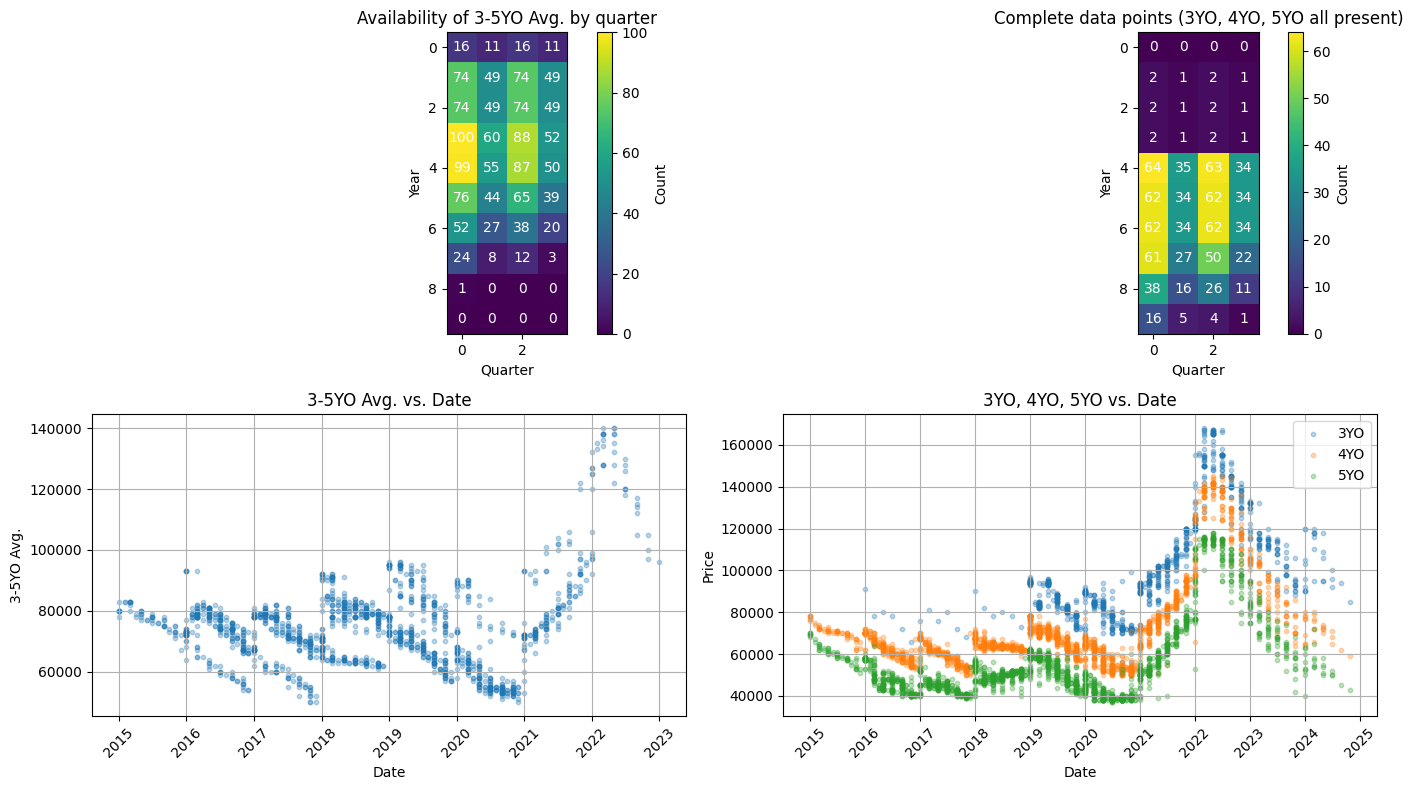


Valid data points per Year-Quarter for each column:


Year  Quarter  3YO  4YO  5YO  3-5YO Avg.  Synthetic Avg
0   2015        1    0   16   16          16             16
1   2015        2    0   11   11          11             11
2   2015        3    0   16   16          16             16
3   2015        4    0   11   11          11             11
4   2016        1    2   76   76          74             76
5   2016        2    1   50   50          49             50
6   2016        3    2   76   76          74             76
7   2016        4    1   50   50          49             50
8   2017        1    2   76   76          74             76
9   2017        2    1   50   50          49             50
10  2017        3    2   76   76          74             76
11  2017        4    1   50   50          49             50
12  2018        1    2  102  102         100            102
13  2018        2    1   61   61          60             61
14  2018        3    2   90   90          88             90
15  2018        4    1   53   53          52             53
16  2019        1   64  139  139          99            139
17  2019        2   35   75   75          55             75
18  2019        3   63  126  126          87            126
19  2019        4   34   69   69          50             69
20  2020        1   62  114  114          76            114
21  2020        2   34   63   63          44             63
22  2020        3   62  103  103          65            103
23  2020        4   34   58   58          39             58
24  2021        1   62   90   90          52             90
25  2021        2   34   46   46          27             46
26  2021        3   62   76   76          38             76
27  2021        4   34   39   39          20             39
28  2022        1   61   62   62          24             62
29  2022        2   27   27   27           8             27
30  2022        3   50   50   50          12             50
31  2022        4   22   22   22           3             22
32  2023        1   38   38   38           1             38
33  2023        2   16   16   16           0             16
34  2023        3   26   26   26           0             26
35  2023        4   11   11   11           0             11
36  2024        1   16   16   16           0             16
37  2024        2    5    5    5           0              5
38  2024        3    4    4    4           0              4
39  2024        4    1    1    1           0              1


Quarters with biggest discrepancy between Original and Synthetic Avg counts:


Year  Quarter  3YO  4YO  5YO  3-5YO Avg.  Synthetic Avg  Missing
0   2015        1    0   16   16          16             16        0
1   2015        2    0   11   11          11             11        0
2   2015        3    0   16   16          16             16        0
3   2015        4    0   11   11          11             11        0
5   2016        2    1   50   50          49             50       -1
7   2016        4    1   50   50          49             50       -1
11  2017        4    1   50   50          49             50       -1
9   2017        2    1   50   50          49             50       -1
39  2024        4    1    1    1           0              1       -1
13  2018        2    1   61   61          60             61       -1

In [46]:
# Diagnostic cell to check quarterly grouping and identify missing values
import pandas as pd
import matplotlib.pyplot as plt

# Convert Date column to datetime format if not already done
if not pd.api.types.is_datetime64_any_dtype(data['Date']):
    data['Date'] = pd.to_datetime(data['Date'])

# Print unique dates in the dataset to verify we have the correct time range
print(f"Date range in dataset: {data['Date'].min()} to {data['Date'].max()}")
print(f"Number of unique dates: {data['Date'].nunique()}")

# Check for NaN values in key columns
print("\nCount of NaN values in key columns:")
print(data[['3YO', '4YO', '5YO', '3-5YO Avg.']].isna().sum())

# Count data points by year and quarter
data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.quarter
data['YearQuarter'] = data['Year'].astype(str) + '-Q' + data['Quarter'].astype(str)

# Count records by year-quarter
yq_counts = data.groupby(['Year', 'Quarter']).size().reset_index(name='count')
print("\nData points per Year-Quarter:")
display(yq_counts)

# Check how many year-quarter combinations have valid values for our columns of interest
cols_of_interest = ['3YO', '4YO', '5YO', '3-5YO Avg.']
valid_data_counts = data.groupby(['Year', 'Quarter'])[cols_of_interest].count().reset_index()

# Create heatmap of data availability
plt.figure(figsize=(14, 8))

# Plot availability of '3-5YO Avg.' column
heatmap_data = valid_data_counts.pivot(index='Year', columns='Quarter', values='3-5YO Avg.')
plt.subplot(2, 2, 1)
plt.title('Availability of 3-5YO Avg. by quarter')
plt.imshow(heatmap_data, cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('Quarter')
plt.ylabel('Year')
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        if not pd.isna(heatmap_data.iloc[i, j]):
            plt.text(j, i, int(heatmap_data.iloc[i, j]), ha='center', va='center', color='white')

# Plot availability of synthetic average (all 3YO, 4YO, 5YO available)
complete_triplets = data.groupby(['Year', 'Quarter']).apply(
    lambda x: (~x[['3YO', '4YO', '5YO']].isna()).all(axis=1).sum()
).reset_index(name='complete_triplets')
heatmap_complete = complete_triplets.pivot(index='Year', columns='Quarter', values='complete_triplets')
plt.subplot(2, 2, 2)
plt.title('Complete data points (3YO, 4YO, 5YO all present)')
plt.imshow(heatmap_complete, cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('Quarter')
plt.ylabel('Year')
for i in range(heatmap_complete.shape[0]):
    for j in range(heatmap_complete.shape[1]):
        if not pd.isna(heatmap_complete.iloc[i, j]):
            plt.text(j, i, int(heatmap_complete.iloc[i, j]), ha='center', va='center', color='white')

# Create scatterplot of the data to see if there are patterns or clusters
plt.subplot(2, 2, 3)
plt.title('3-5YO Avg. vs. Date')
plt.scatter(data['Date'], data['3-5YO Avg.'], alpha=0.3, s=10)
plt.xlabel('Date')
plt.ylabel('3-5YO Avg.')
plt.grid(True)
plt.xticks(rotation=45)

# Examine specific year-quarters where we might be missing data
plt.subplot(2, 2, 4)
plt.title('3YO, 4YO, 5YO vs. Date')
plt.scatter(data['Date'], data['3YO'], label='3YO', alpha=0.3, s=10)
plt.scatter(data['Date'], data['4YO'], label='4YO', alpha=0.3, s=10)
plt.scatter(data['Date'], data['5YO'], label='5YO', alpha=0.3, s=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create a table showing the number of valid data points for each column by year-quarter
valid_counts = data.groupby(['Year', 'Quarter'])[
    ['3YO', '4YO', '5YO', '3-5YO Avg.', 'Synthetic Avg']
].count().reset_index()

print("\nValid data points per Year-Quarter for each column:")
display(valid_counts.sort_values(['Year', 'Quarter']))

# Look at quarters with most missing data
valid_counts['Missing'] = valid_counts['3-5YO Avg.'] - valid_counts['Synthetic Avg']
print("\nQuarters with biggest discrepancy between Original and Synthetic Avg counts:")
display(valid_counts.sort_values('Missing', ascending=False).head(10))

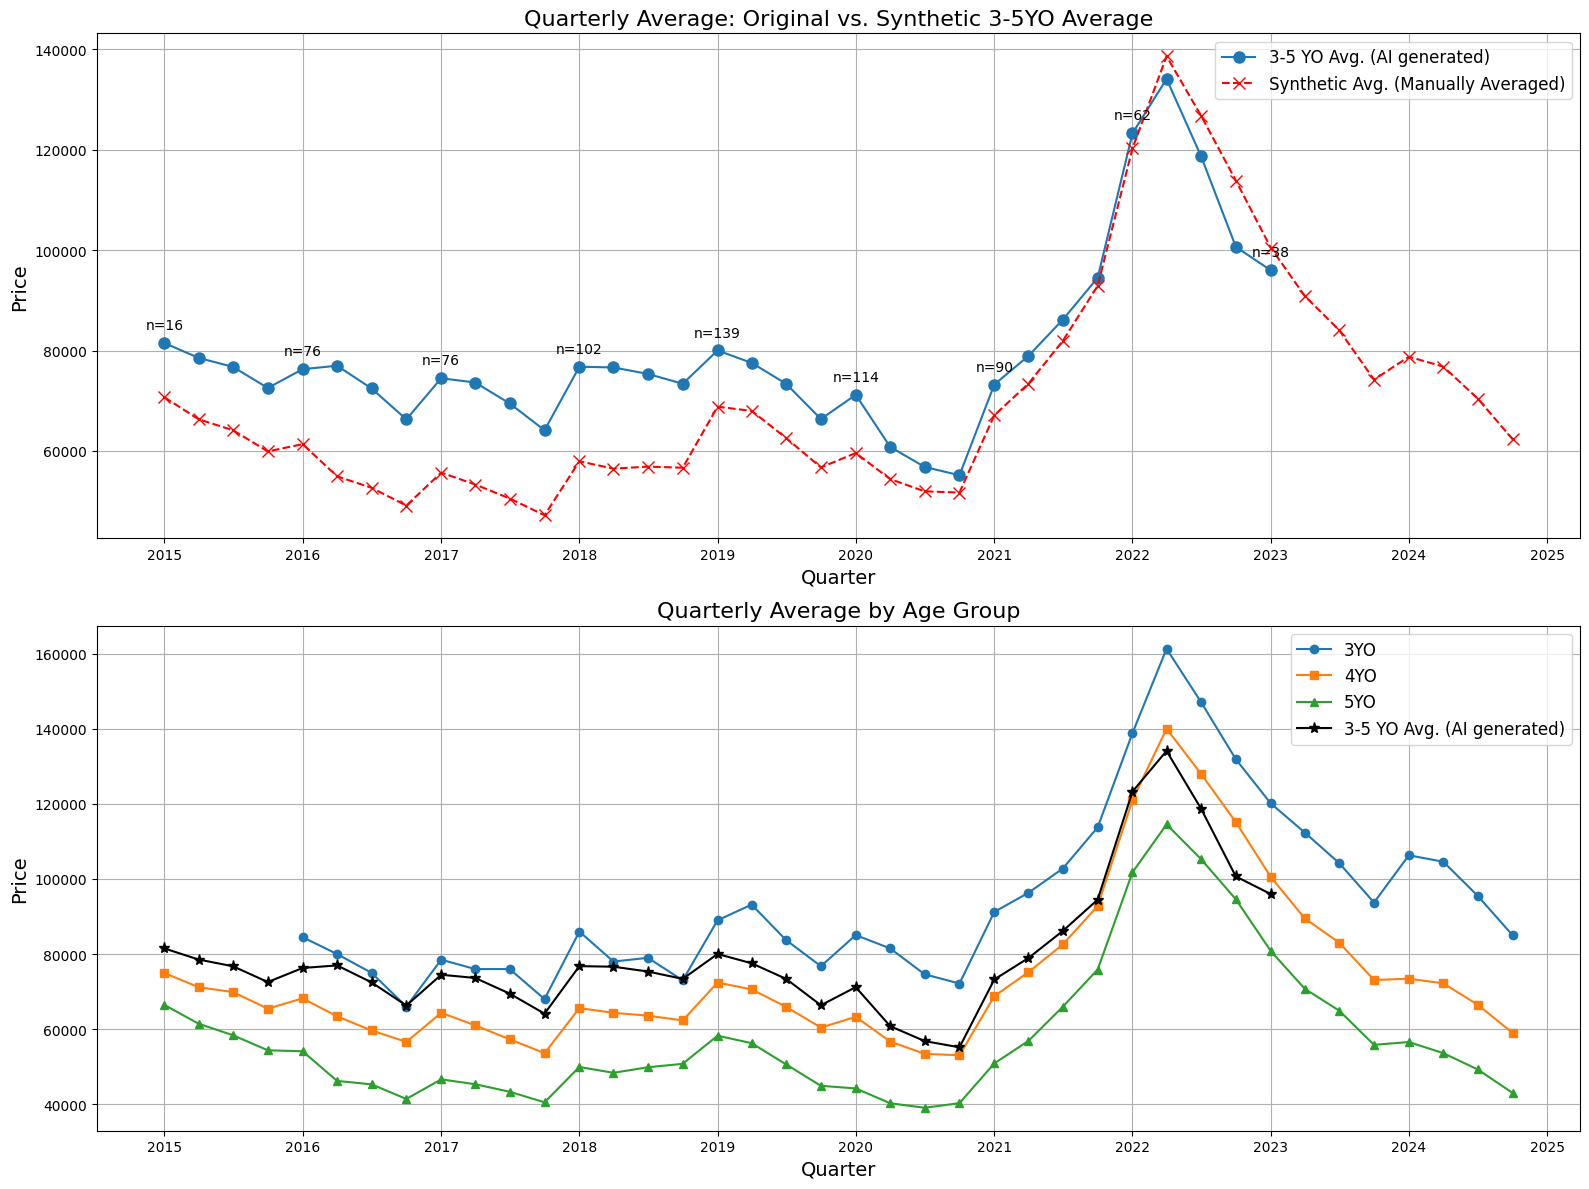

Quarterly Average Difference (Original - Synthetic):


Quarter            3YO            4YO            5YO     3-5YO Avg.  \
0   2015Q1            NaN   74937.500000   66437.500000   81500.000000   
1   2015Q2            NaN   71181.818182   61454.545455   78545.454545   
2   2015Q3            NaN   69875.000000   58375.000000   76750.000000   
3   2015Q4            NaN   65454.545455   54363.636364   72545.454545   
4   2016Q1   84500.000000   68197.368421   54105.263158   76290.540541   
5   2016Q2   80000.000000   63400.000000   46200.000000   76979.591837   
6   2016Q3   75000.000000   59644.736842   45289.473684   72459.459459   
7   2016Q4   66000.000000   56600.000000   41400.000000   66285.714286   
8   2017Q1   78500.000000   64342.105263   46618.421053   74486.486486   
9   2017Q2   76000.000000   61000.000000   45320.000000   73632.653061   
10  2017Q3   76000.000000   57302.631579   43315.789474   69459.459459   
11  2017Q4   68000.000000   53580.000000   40500.000000   64122.448980   
12  2018Q1   86000.000000   65607.843137   49921.568627   76780.000000   
13  2018Q2   78000.000000   64344.262295   48360.655738   76633.333333   
14  2018Q3   79000.000000   63588.888889   49844.444444   75352.272727   
15  2018Q4   73000.000000   62320.754717   50754.716981   73384.615385   
16  2019Q1   89000.000000   72410.071942   58251.798561   80020.202020   
17  2019Q2   93171.428571   70586.666667   56266.666667   77545.454545   
18  2019Q3   83730.158730   65936.507937   50603.174603   73390.804598   
19  2019Q4   76764.705882   60420.289855   44898.550725   66360.000000   
20  2020Q1   85064.516129   63271.929825   44201.754386   71184.210526   
21  2020Q2   81500.000000   56698.412698   40253.968254   60795.454545   
22  2020Q3   74612.903226   53417.475728   39048.543689   56815.384615   
23  2020Q4   72147.058824   53034.482759   40275.862069   55153.846154   
24  2021Q1   91225.806452   68777.777778   50877.777778   73230.769231   
25  2021Q2   96323.529412   75173.913043   56847.826087   78925.925926   
26  2021Q3  102790.322581   82565.789474   65973.684211   86157.894737   
27  2021Q4  113764.705882   92794.871795   75871.794872   94500.000000   
28  2022Q1  138885.245902  121048.387097  101774.193548  123291.666667   
29  2022Q2  161333.333333  140037.037037  114555.555556  134125.000000   
30  2022Q3  147140.000000  128020.000000  105300.000000  118750.000000   
31  2022Q4  131909.090909  115136.363636   94590.909091  100666.666667   
32  2023Q1  120157.894737  100578.947368   80842.105263   96000.000000   
33  2023Q2  112375.000000   89500.000000   70750.000000            NaN   
34  2023Q3  104230.769231   83038.461538   64923.076923            NaN   
35  2023Q4   93727.272727   73090.909091   55818.181818            NaN   
36  2024Q1  106312.500000   73437.500000   56562.500000            NaN   
37  2024Q2  104600.000000   72200.000000   53600.000000            NaN   
38  2024Q3   95500.000000   66500.000000   49250.000000            NaN   
39  2024Q4   85000.000000   59000.000000   43000.000000            NaN   

    Synthetic Avg    Difference  count  
0    70687.500000  10812.500000     16  
1    66318.181818  12227.272727     11  
2    64125.000000  12625.000000     16  
3    59909.090909  12636.363636     11  
4    61344.298246  14946.242295     76  
5    54946.666667  22032.925170     50  
6    52657.894737  19801.564723     76  
7    49110.000000  17175.714286     50  
8    55682.017544  18804.468943     76  
9    53310.000000  20322.653061     50  
10   50519.736842  18939.722617     76  
11   47180.000000  16942.448980     50  
12   57933.006536  18846.993464    102  
13   56469.945355  20163.387978     61  
14   56877.777778  18474.494949     90  
15   56657.232704  16727.382680     53  
16   68811.750600  11208.451421    139  
17   67980.000000   9565.454545     75  
18   62578.042328  10812.762270    126  
19   56714.975845   9645.024155     69  
20   59580.409357  11603.801170    114  
21   54388.888889   6406.565657     63  
22   51944.983819   4870.


Statistics of quarterly differences:


count       33.000000
mean      9975.181827
std       8855.391097
min     -13212.121212
25%       4870.400797
50%      11208.451421
75%      17175.714286
max      22032.925170
Name: Difference, dtype: float64


Correlation between time (quarter) and difference: nan


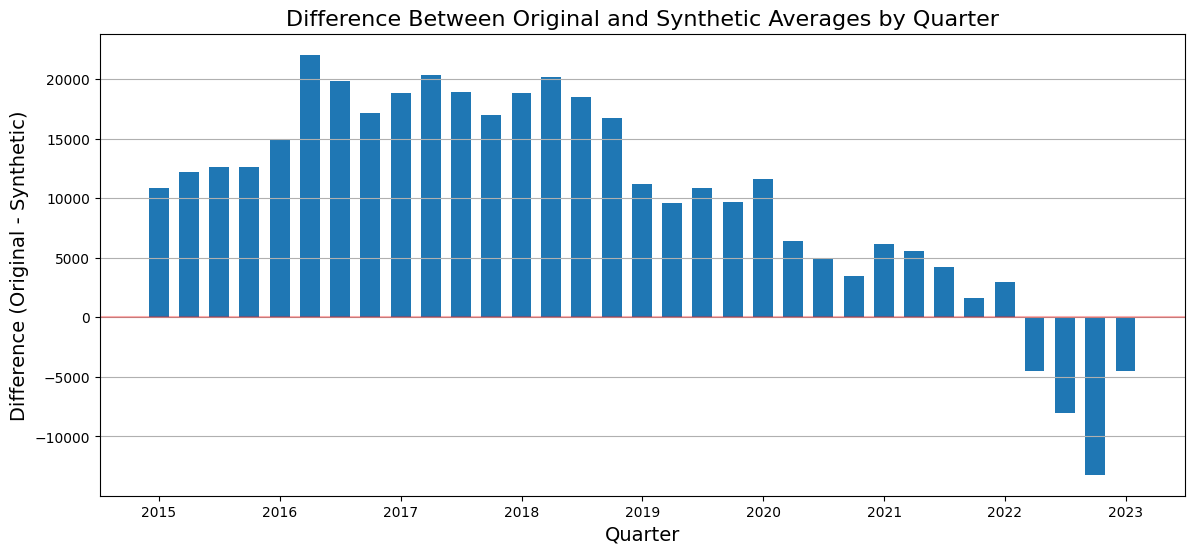

In [47]:
# Group data by quarter and plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Add quarter column to the data
data['Quarter'] = data['Date'].dt.to_period('Q')

# Group by quarter and calculate mean for each column of interest
quarterly_data = data.groupby('Quarter').agg({
    '3YO': 'mean',
    '4YO': 'mean',
    '5YO': 'mean',
    '3-5YO Avg.': 'mean',
    'Synthetic Avg': 'mean'
}).reset_index()

# Convert Period to datetime for plotting
quarterly_data['Date'] = quarterly_data['Quarter'].dt.to_timestamp()

# Calculate how many data points were averaged per quarter
count_per_quarter = data.groupby('Quarter').size().reset_index(name='count')
quarterly_data = pd.merge(quarterly_data, count_per_quarter, on='Quarter')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Original vs Synthetic 3-5YO Avg.
ax1.plot(quarterly_data['Date'], quarterly_data['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker='o', linestyle='-', markersize=8)
ax1.plot(quarterly_data['Date'], quarterly_data['Synthetic Avg'], 
         label='Synthetic Avg. (Manually Averaged)', marker='x', linestyle='--', markersize=8, color='red')
ax1.set_title('Quarterly Average: Original vs. Synthetic 3-5YO Average', fontsize=16)
ax1.set_xlabel('Quarter', fontsize=14)
ax1.set_ylabel('Price', fontsize=14)
ax1.grid(True)
ax1.legend(fontsize=12)

# Annotate with count of data points per quarter (every 4th quarter for readability)
for i, row in quarterly_data.iloc[::4].iterrows():
    ax1.annotate(f"n={row['count']}", 
                 (row['Date'], row['3-5YO Avg.']), 
                 textcoords="offset points",
                 xytext=(0,10), 
                 ha='center')

# Plot 2: All age groups
ax2.plot(quarterly_data['Date'], quarterly_data['3YO'], 
         label='3YO', marker='o', linestyle='-', markersize=6)
ax2.plot(quarterly_data['Date'], quarterly_data['4YO'], 
         label='4YO', marker='s', linestyle='-', markersize=6)
ax2.plot(quarterly_data['Date'], quarterly_data['5YO'], 
         label='5YO', marker='^', linestyle='-', markersize=6)
ax2.plot(quarterly_data['Date'], quarterly_data['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker='*', linestyle='-', markersize=8, color='black')
ax2.set_title('Quarterly Average by Age Group', fontsize=16)
ax2.set_xlabel('Quarter', fontsize=14)
ax2.set_ylabel('Price', fontsize=14)
ax2.grid(True)
ax2.legend(fontsize=12)

plt.tight_layout()
plt.show()

# Calculate and display the average difference per quarter
quarterly_data['Difference'] = quarterly_data['3-5YO Avg.'] - quarterly_data['Synthetic Avg']
print('Quarterly Average Difference (Original - Synthetic):')
display(quarterly_data[['Quarter', '3YO', '4YO', '5YO', '3-5YO Avg.', 'Synthetic Avg', 'Difference', 'count']].sort_values('Quarter'))

# Calculate overall statistics of the quarterly differences
print('\nStatistics of quarterly differences:')
display(quarterly_data['Difference'].describe())

# Check for correlation between quarter and difference
quarterly_data['Quarter_num'] = quarterly_data['Date'].astype(int) // 10**9  # Convert to UNIX timestamp
diff_corr = np.corrcoef(quarterly_data['Quarter_num'], quarterly_data['Difference'])[0,1]
print(f"\nCorrelation between time (quarter) and difference: {diff_corr:.4f}")

# Plot the differences over time
plt.figure(figsize=(14, 6))
plt.bar(quarterly_data['Date'], quarterly_data['Difference'], width=60)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Difference Between Original and Synthetic Averages by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Difference (Original - Synthetic)', fontsize=14)
plt.grid(True, axis='y')
plt.show()

Testing 286 weight combinations where 3YO > 4YO > 5YO


C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1435989161.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows[f'Weighted {weights}'] = valid_rows.apply(
C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1435989161.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows.drop(columns=[f'Weighted {weights}'], inplace=True)
C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1435989161.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the


Top 10 Weight Schemes by Mean Squared Error (3YO > 4YO > 5YO):


C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1435989161.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows.drop(columns=[f'Weighted {weights}'], inplace=True)
C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1435989161.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows[f'Weighted {weights}'] = valid_rows.apply(
C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1435989161.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

Weights     Normalized Weights           MSE          MAE  \
164     (3, 2.75, 2.5)  (0.364, 0.333, 0.303)  1.016198e+07  2542.003667   
119  (2.75, 2.5, 2.25)    (0.367, 0.333, 0.3)  1.069478e+07  2629.774614   
83      (2.5, 2.25, 2)   (0.37, 0.333, 0.296)  1.138265e+07  2738.631870   
219     (3.5, 3, 2.75)  (0.378, 0.324, 0.297)  1.217784e+07  2859.671059   
55     (2.25, 2, 1.75)  (0.375, 0.333, 0.292)  1.229921e+07  2879.448399   
163    (3, 2.75, 2.25)  (0.375, 0.344, 0.281)  1.327813e+07  3026.690391   
34      (2, 1.75, 1.5)  (0.381, 0.333, 0.286)  1.357026e+07  3066.598882   
285        (4, 3.5, 3)  (0.381, 0.333, 0.286)  1.357026e+07  3066.598882   
155     (3, 2.5, 2.25)   (0.387, 0.323, 0.29)  1.387777e+07  3108.024337   
118     (2.75, 2.5, 2)  (0.379, 0.345, 0.276)  1.436198e+07  3181.617376   

     Correlation  Weight String Norm Weight String  
164     0.994348     3:2.75:2.5  0.364:0.333:0.303  
119     0.994302  2.75:2.5:2.25    0.367:0.333:0.3  
83      0.994246     2.5:2.25:2   0.37:0.333:0.296  
219     0.994130     3.5:3:2.75  0.378:0.324:0.297  
55      0.994174    2.25:2:1.75  0.375:0.333:0.292  
163     0.994163    3:2.75:2.25  0.375:0.344:0.281  
34      0.994080     2:1.75:1.5  0.381:0.333:0.286  
285     0.994080        4:3.5:3  0.381:0.333:0.286  
155     0.993992     3:2.5:2.25   0.387:0.323:0.29  
118     0.994093     2.75:2.5:2  0.379:0.345:0.276


Best weight scheme: 3:2.75:2.5 (3YO:4YO:5YO)
Normalized to 1: 0.364:0.333:0.303 (3YO:4YO:5YO)


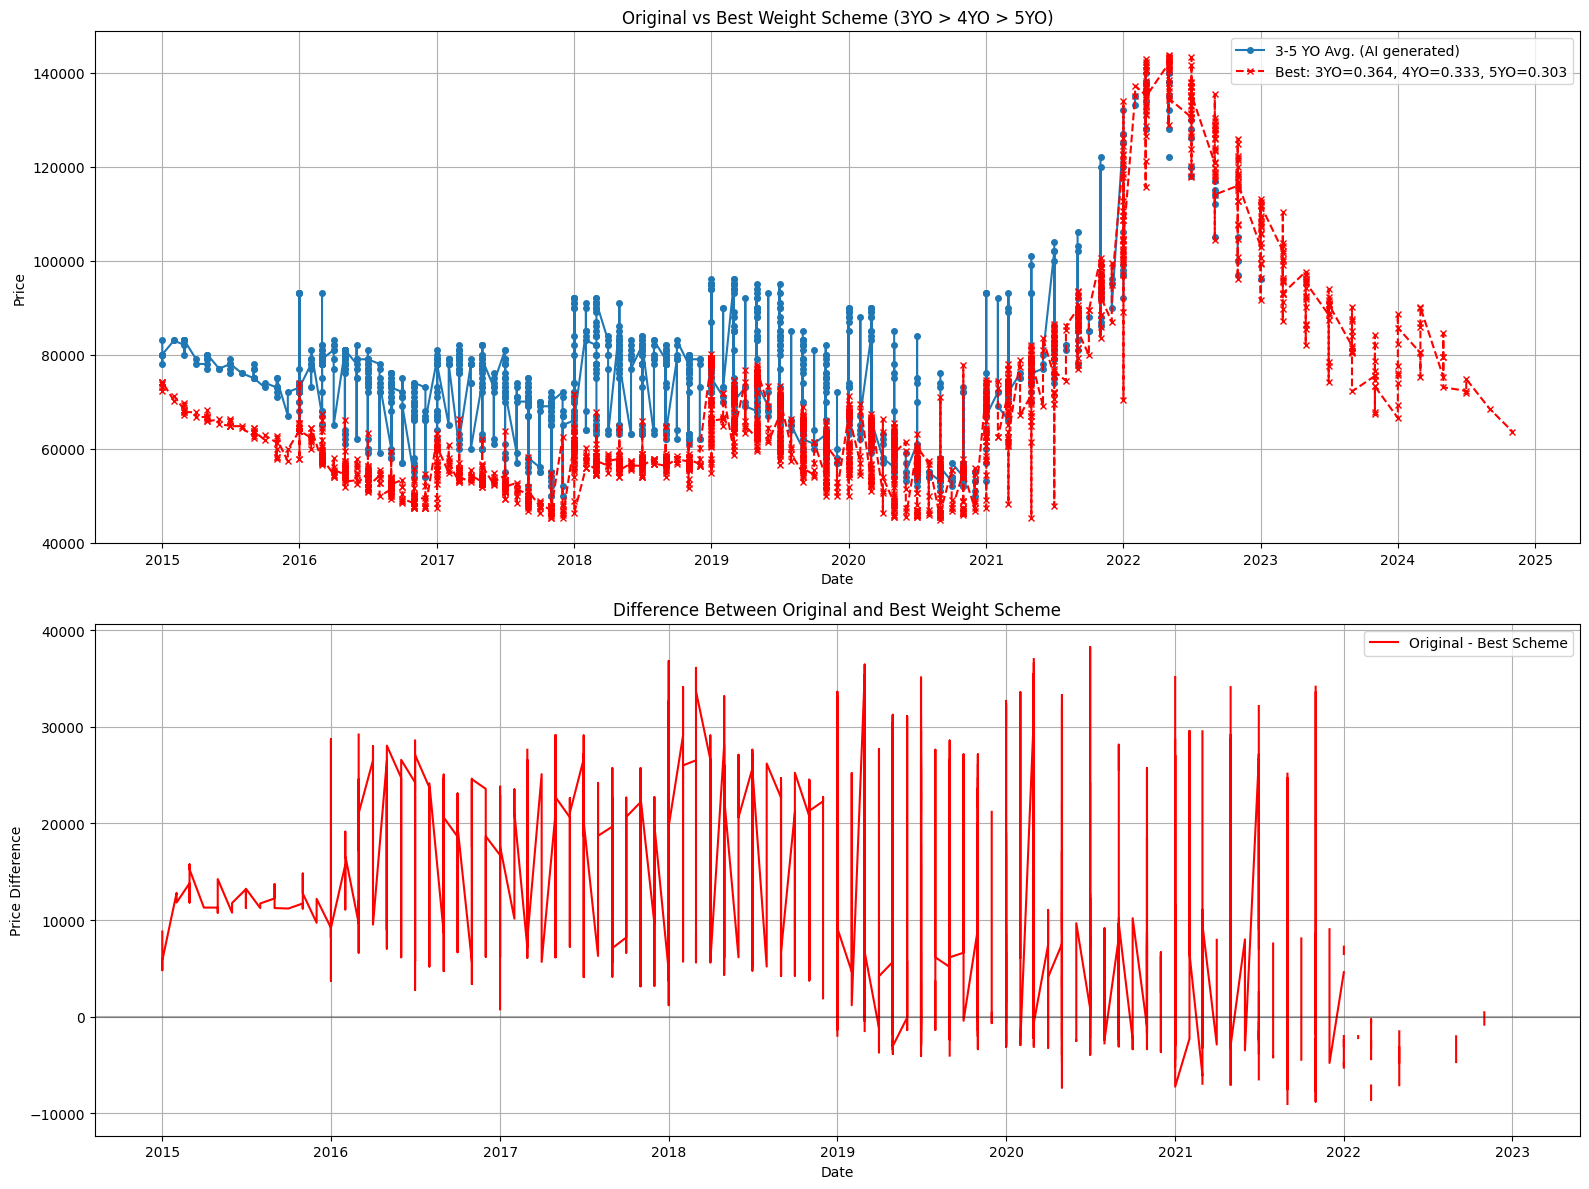

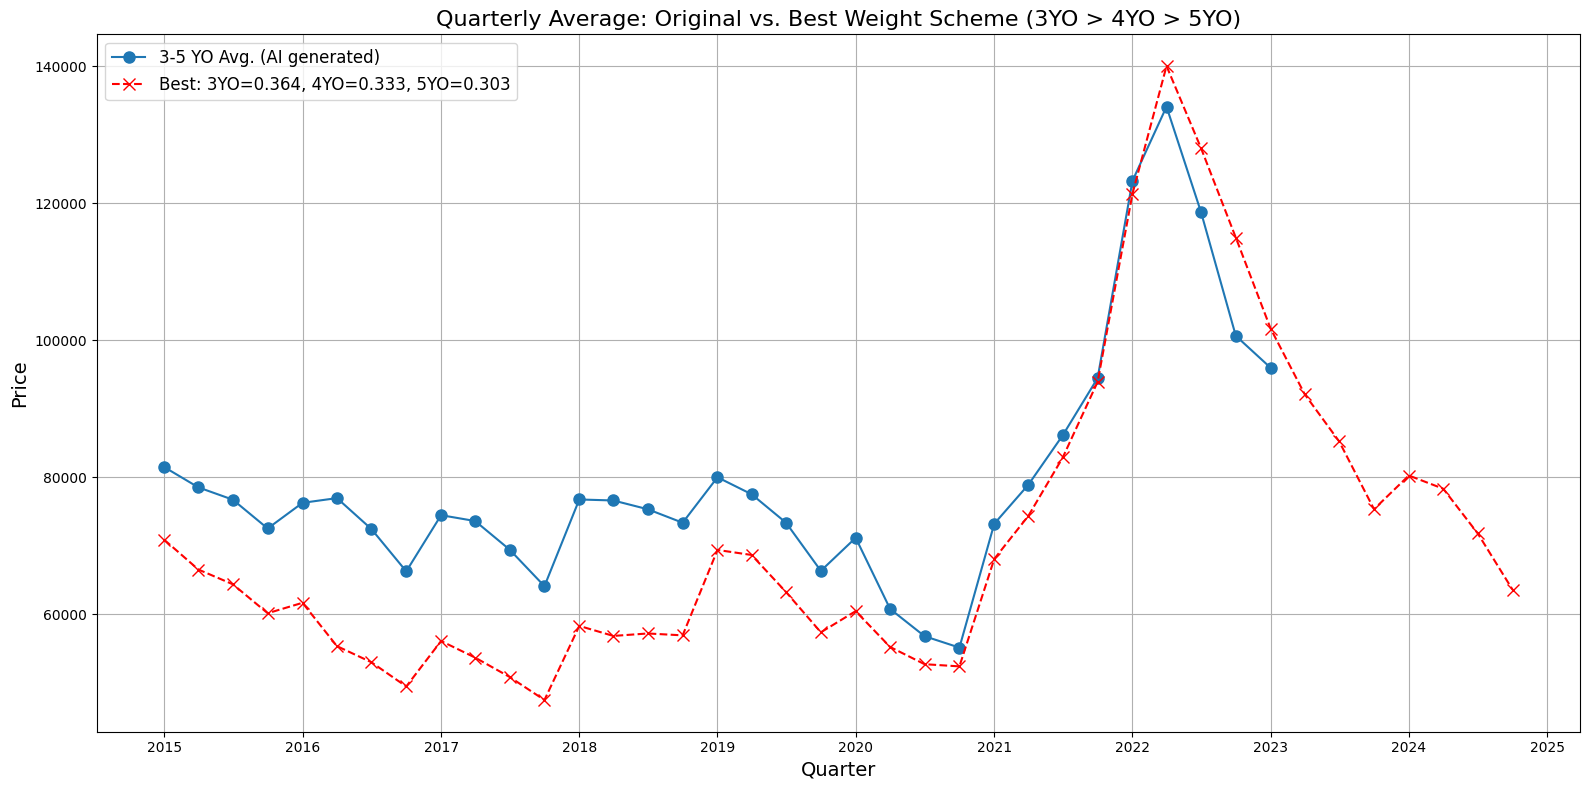


Statistics for Difference between Original and Best Scheme:


count     1546.000000
mean     13679.876290
std      10850.662465
min      -9909.090909
25%       5666.666667
50%      13119.047619
75%      22714.285714
max      38238.095238
Name: Diff Best, dtype: float64

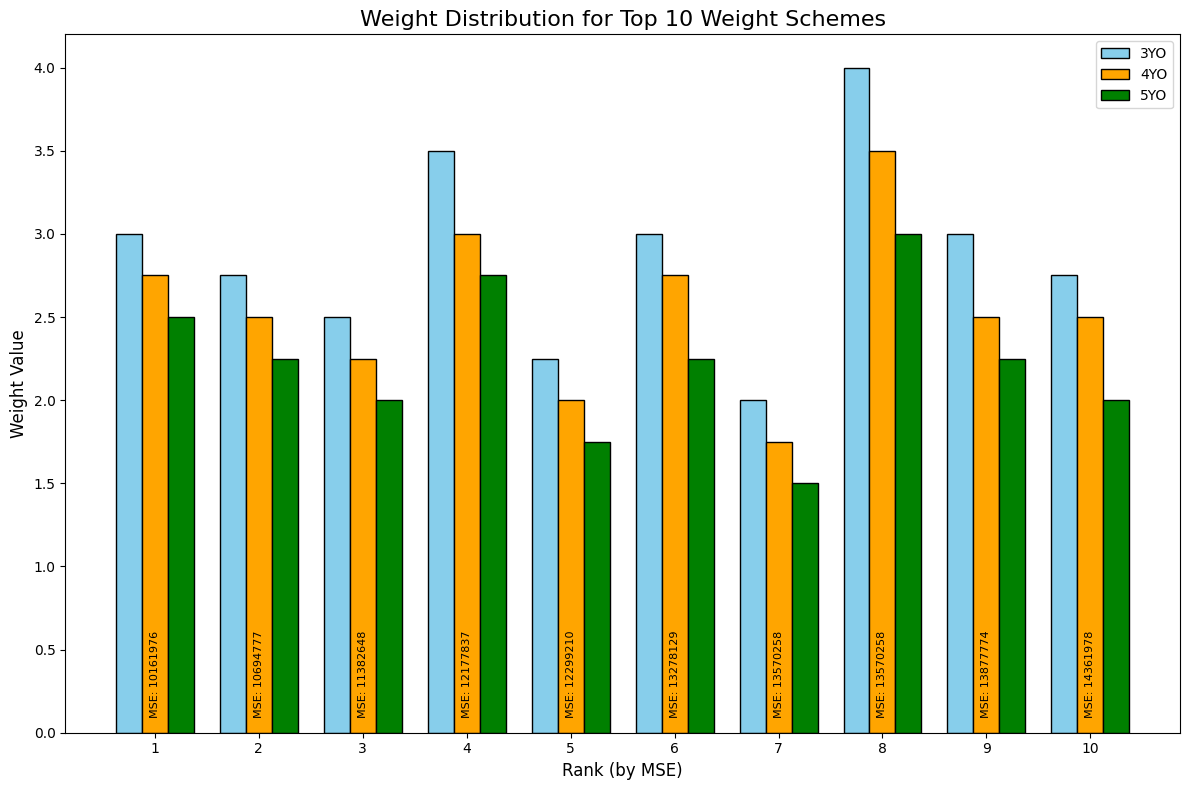

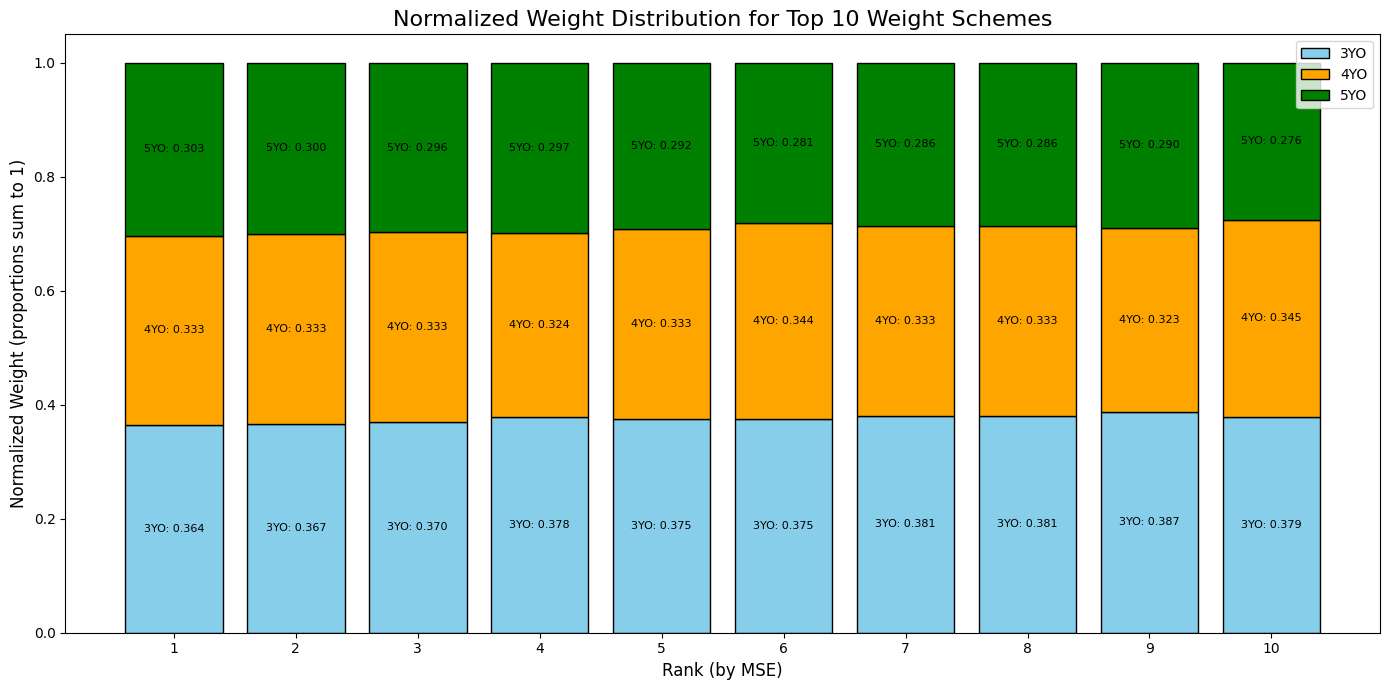


Normalized weights for top 10 schemes:


Rank    3YO    4YO    5YO           MSE       MAE  Correlation
164     1  0.364  0.333  0.303  1.016198e+07  2542.004        0.994
119     2  0.367  0.333  0.300  1.069478e+07  2629.775        0.994
83      3  0.370  0.333  0.296  1.138265e+07  2738.632        0.994
219     4  0.378  0.324  0.297  1.217784e+07  2859.671        0.994
55      5  0.375  0.333  0.292  1.229921e+07  2879.448        0.994
163     6  0.375  0.344  0.281  1.327813e+07  3026.690        0.994
34      7  0.381  0.333  0.286  1.357026e+07  3066.599        0.994
285     8  0.381  0.333  0.286  1.357026e+07  3066.599        0.994
155     9  0.387  0.323  0.290  1.387777e+07  3108.024        0.994
118    10  0.379  0.345  0.276  1.436198e+07  3181.617        0.994


Weight ratios for best scheme:
3YO:4YO ratio = 1.09
4YO:5YO ratio = 1.10
3YO:5YO ratio = 1.20


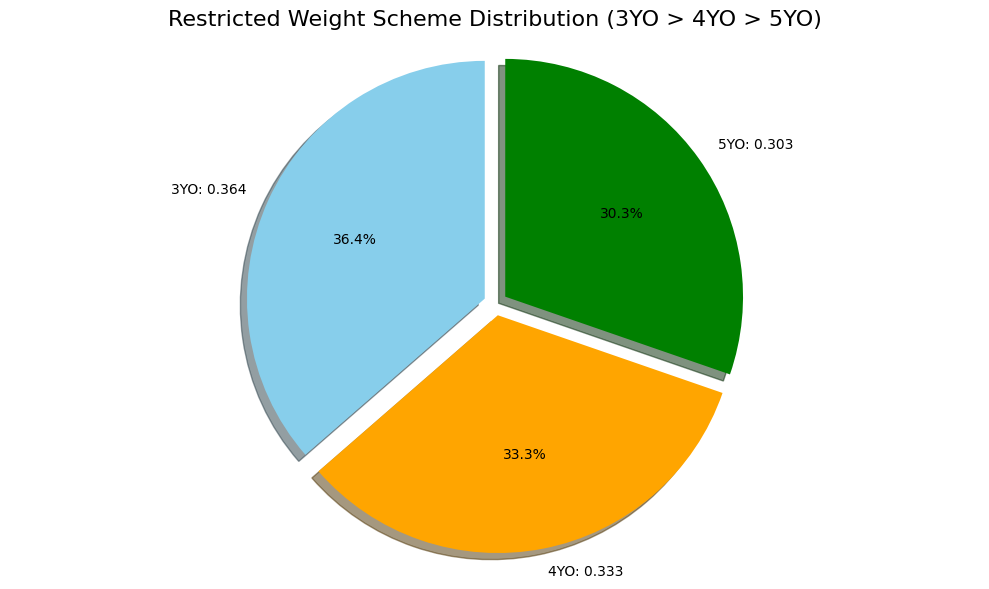

In [48]:
# Find the best weight scheme where 3YO > 4YO > 5YO and plot it
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define a function to calculate weighted average with different weights
def calculate_weighted_avg(row, weights):
    """Calculate weighted average based on provided weights"""
    values = np.array([row['3YO'], row['4YO'], row['5YO']])
    weights_array = np.array(weights)
    # Check if we have all values
    if not np.isnan(values).any():
        return np.average(values, weights=weights_array)
    # If 3YO is missing but we have 4YO and 5YO
    elif np.isnan(values[0]) and not np.isnan(values[1]) and not np.isnan(values[2]):
        return np.average(values[1:], weights=weights_array[1:] / weights_array[1:].sum())
    # Other cases - return NaN
    else:
        return np.nan

# Only use rows where we have both the original average and all age values
valid_rows = data.dropna(subset=['3YO', '4YO', '5YO', '3-5YO Avg.'])

# Generate weight combinations ensuring 3YO > 4YO > 5YO
weight_combinations = []
base_weights = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.5, 4]

# Generate combinations where 3YO > 4YO > 5YO
for w1 in base_weights:
    for w2 in base_weights:
        if w2 < w1:  # 4YO weight must be less than 3YO weight
            for w3 in base_weights:
                if w3 < w2:  # 5YO weight must be less than 4YO weight
                    weight_combinations.append((w1, w2, w3))

print(f"Testing {len(weight_combinations)} weight combinations where 3YO > 4YO > 5YO")

# Calculate mean squared error for each weight combination
results = []

for weights in weight_combinations:
    # Calculate weighted average for this weight combination
    valid_rows[f'Weighted {weights}'] = valid_rows.apply(
        lambda row: calculate_weighted_avg(row, weights), axis=1)
    
    # Calculate Mean Squared Error (MSE)
    mse = ((valid_rows['3-5YO Avg.'] - valid_rows[f'Weighted {weights}']) ** 2).mean()
    
    # Calculate Mean Absolute Error (MAE)
    mae = (valid_rows['3-5YO Avg.'] - valid_rows[f'Weighted {weights}']).abs().mean()
    
    # Calculate correlation
    corr = valid_rows['3-5YO Avg.'].corr(valid_rows[f'Weighted {weights}'])
    
    # Calculate normalized weights (weights that sum to 1)
    w_sum = sum(weights)
    norm_weights = tuple(round(w/w_sum, 3) for w in weights)
    
    results.append({
        'Weights': weights,
        'Normalized Weights': norm_weights,
        'MSE': mse,
        'MAE': mae,
        'Correlation': corr,
        'Weight String': f'{weights[0]}:{weights[1]}:{weights[2]}',
        'Norm Weight String': f'{norm_weights[0]}:{norm_weights[1]}:{norm_weights[2]}'
    })
    
    # Drop the column to avoid creating too many columns
    valid_rows.drop(columns=[f'Weighted {weights}'], inplace=True)

# Convert results to DataFrame and sort by MSE (lowest first)
results_df = pd.DataFrame(results).sort_values('MSE')

# Display the top 10 best weight schemes based on MSE
print("\nTop 10 Weight Schemes by Mean Squared Error (3YO > 4YO > 5YO):")
display(results_df.head(10))

# Get the best weight combination
best_weights = results_df.iloc[0]['Weights']
best_norm_weights = results_df.iloc[0]['Normalized Weights']

print(f"\nBest weight scheme: {best_weights[0]}:{best_weights[1]}:{best_weights[2]} (3YO:4YO:5YO)")
print(f"Normalized to 1: {best_norm_weights[0]}:{best_norm_weights[1]}:{best_norm_weights[2]} (3YO:4YO:5YO)")

# Create a label that clearly identifies which weight belongs to which age
best_label = f"Best: 3YO={best_norm_weights[0]}, 4YO={best_norm_weights[1]}, 5YO={best_norm_weights[2]}"

# Calculate the weighted average with the best weight scheme for all data points
data['Best Weight Scheme'] = data.apply(
    lambda row: calculate_weighted_avg(row, best_weights), axis=1)

# Create plots to compare the best weight scheme with the original average
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Sort data by date for plotting
data_sorted = data.sort_values('Date')

# First plot - Original vs Best Weight Scheme
axes[0].plot(data_sorted['Date'], data_sorted['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker='o', linestyle='-', markersize=4)
axes[0].plot(data_sorted['Date'], data_sorted['Best Weight Scheme'], 
         label=best_label, marker='x', linestyle='--', markersize=4, color='red')
axes[0].set_title('Original vs Best Weight Scheme (3YO > 4YO > 5YO)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].grid(True)
axes[0].legend()

# Second plot - Difference between original and best weight scheme
data_sorted['Diff Best'] = data_sorted['3-5YO Avg.'] - data_sorted['Best Weight Scheme']
axes[1].plot(data_sorted['Date'], data_sorted['Diff Best'], label=f'Original - Best Scheme', color='red')
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1].set_title('Difference Between Original and Best Weight Scheme')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price Difference')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

# Create a quarterly view
# Group by quarter and calculate mean for each column of interest
data['Quarter'] = data['Date'].dt.to_period('Q')
quarterly_data = data.groupby('Quarter').agg({
    '3-5YO Avg.': 'mean',
    'Best Weight Scheme': 'mean'
}).reset_index()

# Convert Period to datetime for plotting
quarterly_data['Date'] = quarterly_data['Quarter'].dt.to_timestamp()

# Plot the quarterly data
plt.figure(figsize=(16, 8))
plt.plot(quarterly_data['Date'], quarterly_data['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker='o', linestyle='-', markersize=8)
plt.plot(quarterly_data['Date'], quarterly_data['Best Weight Scheme'], 
         label=best_label, marker='x', linestyle='--', markersize=8, color='red')
plt.title('Quarterly Average: Original vs. Best Weight Scheme (3YO > 4YO > 5YO)', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Calculate statistics for the difference
diff_stats = data_sorted['Diff Best'].describe()

print(f"\nStatistics for Difference between Original and Best Scheme:")
display(diff_stats)

# Create a visualization showing weight distributions of top schemes
top_n = 10
top_schemes = results_df.head(top_n)

plt.figure(figsize=(12, 8))

# Set up bar positions
bar_width = 0.25
r1 = np.arange(top_n)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars for 3YO, 4YO, and 5YO weights
bars1 = plt.bar(r1, [w[0] for w in top_schemes['Weights']], width=bar_width, label='3YO', color='skyblue', edgecolor='black')
bars2 = plt.bar(r2, [w[1] for w in top_schemes['Weights']], width=bar_width, label='4YO', color='orange', edgecolor='black')
bars3 = plt.bar(r3, [w[2] for w in top_schemes['Weights']], width=bar_width, label='5YO', color='green', edgecolor='black')

# Add labels and title
plt.xlabel('Rank (by MSE)', fontsize=12)
plt.ylabel('Weight Value', fontsize=12)
plt.title('Weight Distribution for Top 10 Weight Schemes', fontsize=16)
plt.xticks([r + bar_width for r in range(top_n)], [f'{i+1}' for i in range(top_n)])
plt.legend()

# Add MSE values as text
for i, mse in enumerate(top_schemes['MSE']):
    plt.text(i + bar_width, 0.1, f'MSE: {mse:.0f}', rotation=90, ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Create a chart showing the normalized weights
plt.figure(figsize=(14, 7))

# Extract the normalized weights for the top schemes
weights_3YO = [w[0] for w in top_schemes['Normalized Weights']]
weights_4YO = [w[1] for w in top_schemes['Normalized Weights']]
weights_5YO = [w[2] for w in top_schemes['Normalized Weights']]

# Create a stacked bar chart to show the proportion of weights
plt.bar(range(top_n), weights_3YO, color='skyblue', edgecolor='black', label='3YO')
plt.bar(range(top_n), weights_4YO, bottom=weights_3YO, color='orange', edgecolor='black', label='4YO')
plt.bar(range(top_n), weights_5YO, bottom=[sum(x) for x in zip(weights_3YO, weights_4YO)], color='green', edgecolor='black', label='5YO')

# Add labels and title
plt.xlabel('Rank (by MSE)', fontsize=12)
plt.ylabel('Normalized Weight (proportions sum to 1)', fontsize=12)
plt.title('Normalized Weight Distribution for Top 10 Weight Schemes', fontsize=16)
plt.xticks(range(top_n), [f'{i+1}' for i in range(top_n)])
plt.legend()

# Add specific weight labels inside each segment with age group indicator
for i in range(top_n):
    # Label for 3YO (center of its section)
    y_3YO = weights_3YO[i] / 2
    plt.text(i, y_3YO, f'3YO: {weights_3YO[i]:.3f}', ha='center', va='center', fontsize=8)
    
    # Label for 4YO (center of its section)
    y_4YO = weights_3YO[i] + weights_4YO[i] / 2
    plt.text(i, y_4YO, f'4YO: {weights_4YO[i]:.3f}', ha='center', va='center', fontsize=8)
    
    # Label for 5YO (center of its section)
    y_5YO = weights_3YO[i] + weights_4YO[i] + weights_5YO[i] / 2
    plt.text(i, y_5YO, f'5YO: {weights_5YO[i]:.3f}', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Print the exact normalized weights for the top schemes
print("\nNormalized weights for top 10 schemes:")
norm_weights_display = pd.DataFrame({
    'Rank': range(1, top_n+1),
    '3YO': weights_3YO,
    '4YO': weights_4YO,
    '5YO': weights_5YO,
    'MSE': top_schemes['MSE'],
    'MAE': top_schemes['MAE'],
    'Correlation': top_schemes['Correlation']
})
display(norm_weights_display.round(3))

# Add information about the ratio between weights for the best scheme
print("\nWeight ratios for best scheme:")
best_norm_ratio = best_norm_weights
print(f"3YO:4YO ratio = {best_norm_ratio[0]/best_norm_ratio[1]:.2f}")
print(f"4YO:5YO ratio = {best_norm_ratio[1]/best_norm_ratio[2]:.2f}")
print(f"3YO:5YO ratio = {best_norm_ratio[0]/best_norm_ratio[2]:.2f}")

# Create a detailed visualization of the best weight scheme
plt.figure(figsize=(10, 6))

# Create a pie chart for the best weight scheme
plt.pie([best_norm_weights[0], best_norm_weights[1], best_norm_weights[2]], 
        labels=[f'3YO: {best_norm_weights[0]:.3f}', 
                f'4YO: {best_norm_weights[1]:.3f}', 
                f'5YO: {best_norm_weights[2]:.3f}'],
        autopct='%1.1f%%',
        colors=['skyblue', 'orange', 'green'],
        explode=(0.05, 0.05, 0.05),
        shadow=True,
        startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Restricted Weight Scheme Distribution (3YO > 4YO > 5YO)', fontsize=16)
plt.tight_layout()
plt.show()

Sum of specified weights: 1.0003

Error Metrics for Informed Weight Scheme:
Mean Squared Error (MSE): 12264163.42
Mean Absolute Error (MAE): 2874.19
Correlation: 0.9942


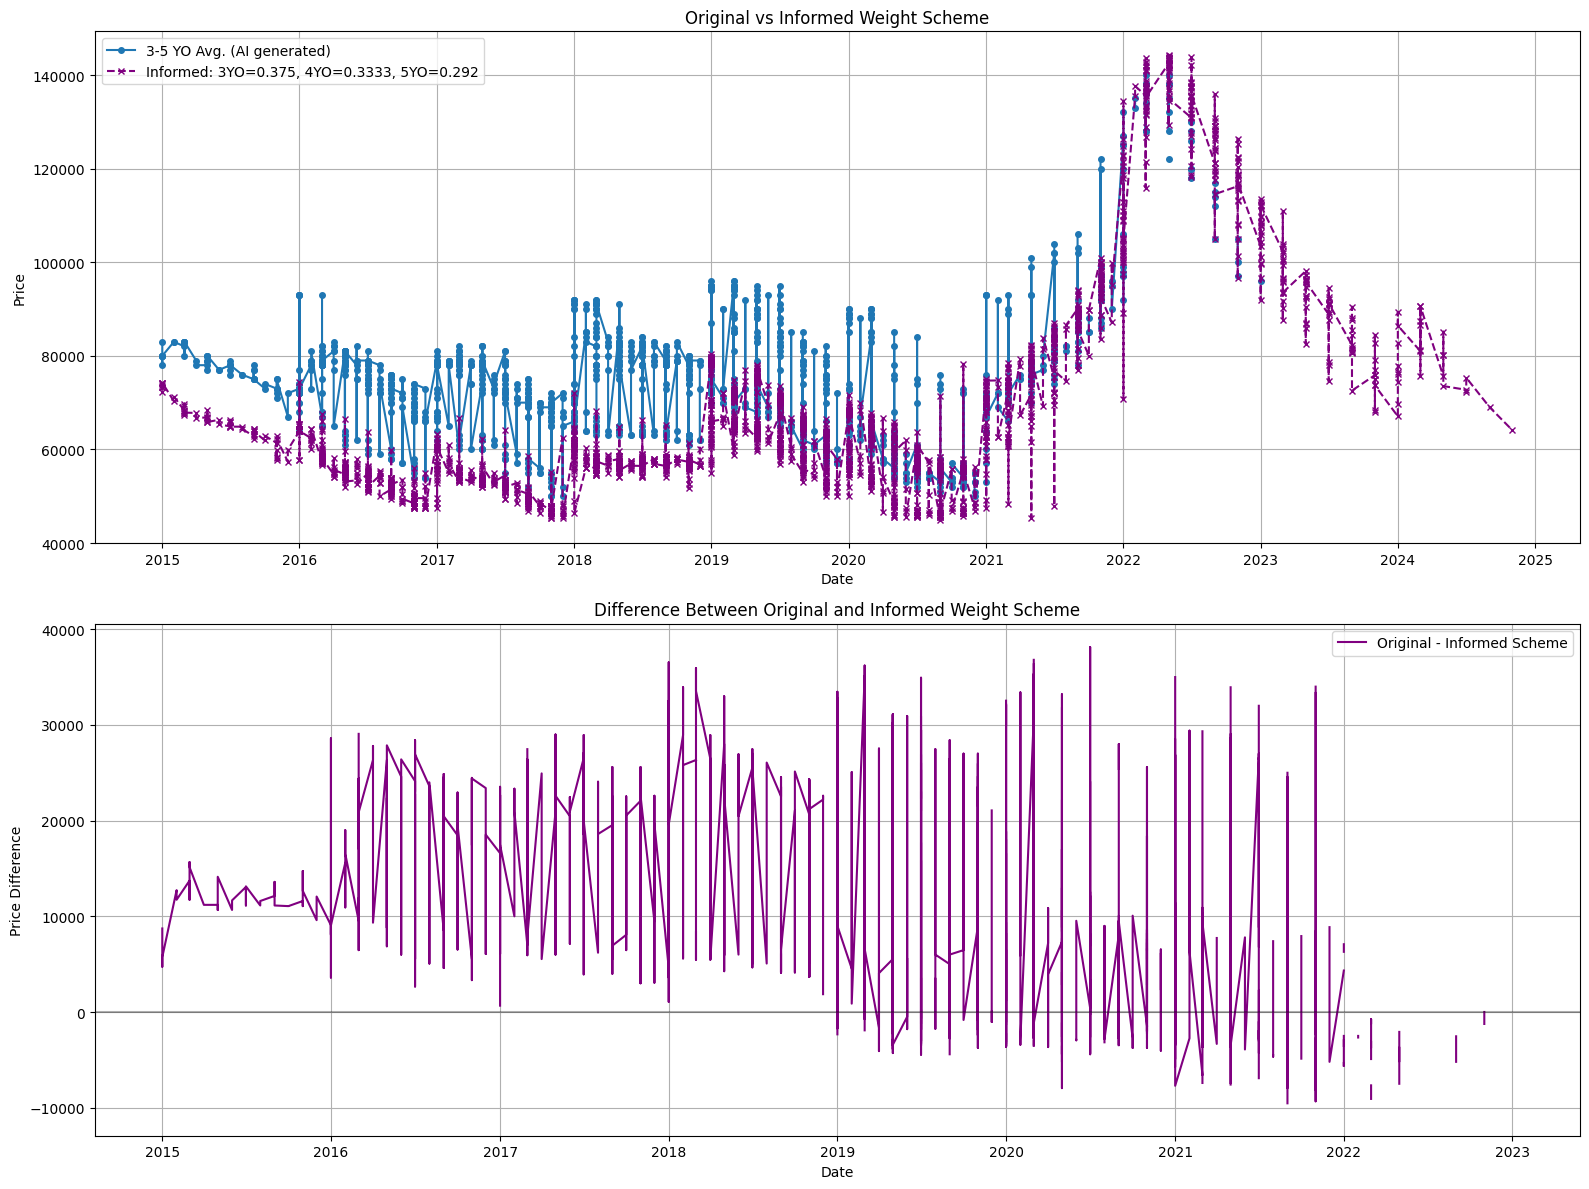

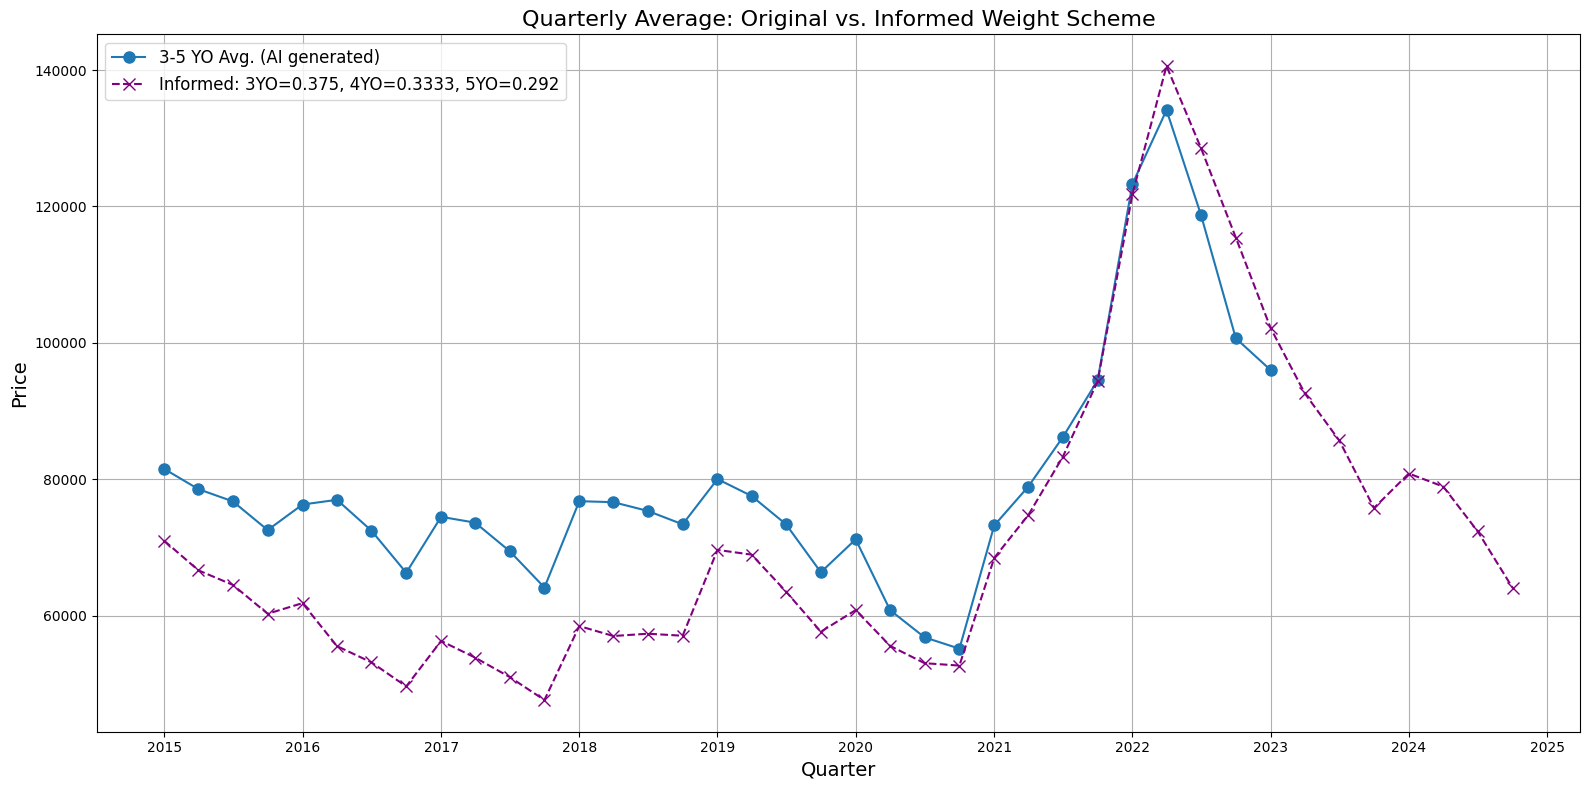


Statistics for Difference between Original and Informed Scheme:


count     1546.000000
mean     13489.640893
std      10922.740672
min     -10490.552834
25%       5537.661922
50%      12971.613625
75%      22603.710219
max      38136.734368
Name: Diff Informed, dtype: float64

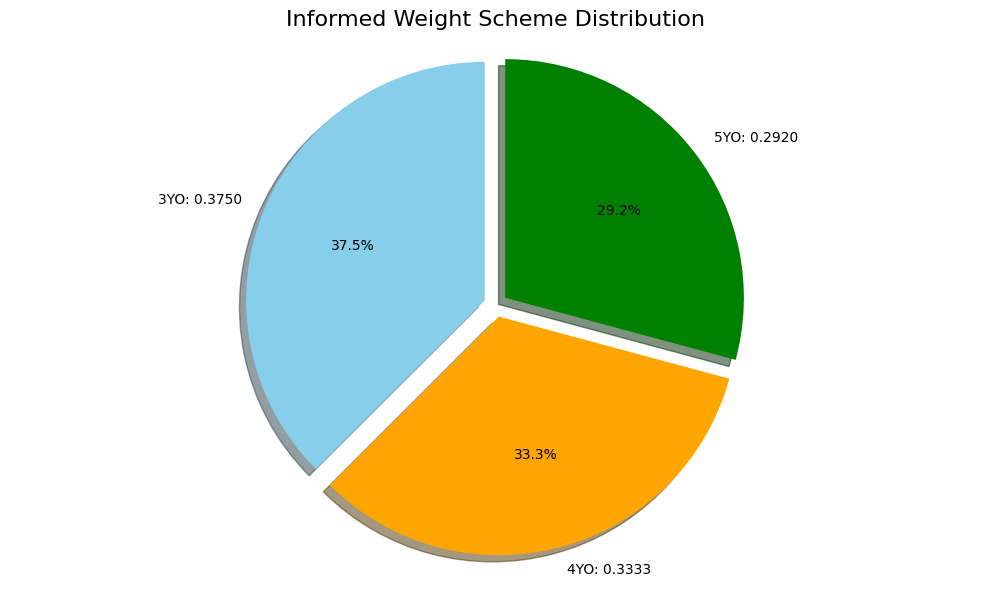

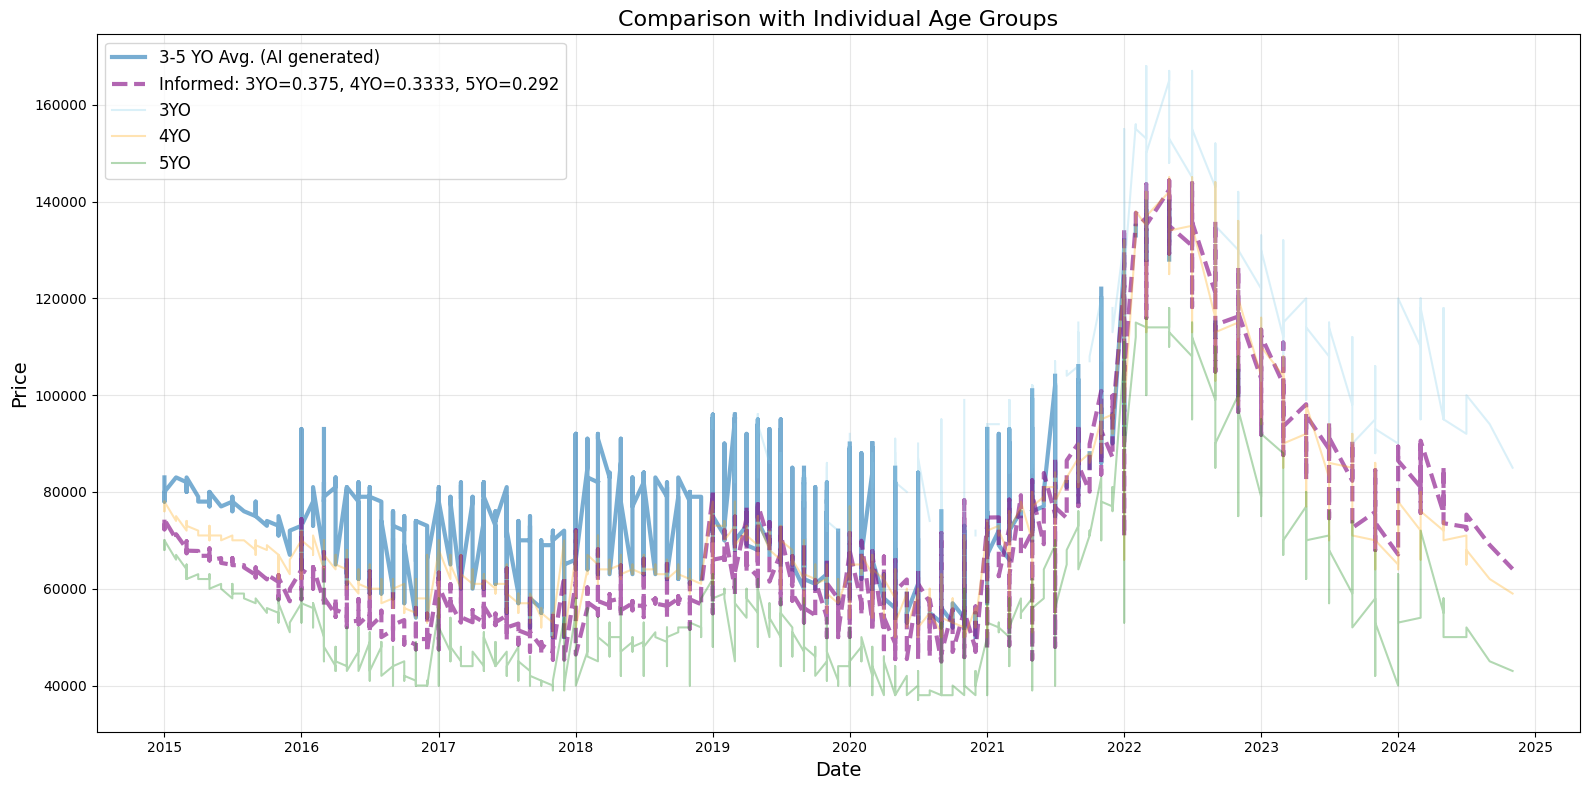

In [49]:
# Plot results using the specified weight scheme: 3YO = 0.375, 4YO = 0.3333, 5YO = 0.292
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the specific weights provided
specified_weights = (0.375, 0.3333, 0.292)

# For raw weights (not normalized), we need to scale these proportional values
raw_weights = specified_weights  # These are already proportional so we can use them directly

# Define a function to calculate weighted average with different weights
def calculate_weighted_avg(row, weights):
    """Calculate weighted average based on provided weights"""
    values = np.array([row['3YO'], row['4YO'], row['5YO']])
    weights_array = np.array(weights)
    # Check if we have all values
    if not np.isnan(values).any():
        return np.average(values, weights=weights_array)
    # If 3YO is missing but we have 4YO and 5YO
    elif np.isnan(values[0]) and not np.isnan(values[1]) and not np.isnan(values[2]):
        return np.average(values[1:], weights=weights_array[1:] / weights_array[1:].sum())
    # Other cases - return NaN
    else:
        return np.nan

# Verify the weights sum up to 1 (or very close to it)
weights_sum = sum(specified_weights)
print(f"Sum of specified weights: {weights_sum:.4f}")
if abs(weights_sum - 1) > 0.01:
    print("Warning: The specified weights don't exactly sum to 1.0, but we'll proceed with the analysis.")

# Calculate the weighted average using the specified weights
data['Informed Weight Scheme'] = data.apply(
    lambda row: calculate_weighted_avg(row, raw_weights), axis=1)

# Create a label that clearly identifies which weight belongs to which age
specified_label = f"Informed: 3YO={specified_weights[0]}, 4YO={specified_weights[1]}, 5YO={specified_weights[2]}"

# Only use rows where we have both the original average and all age values for error calculation
valid_rows = data.dropna(subset=['3YO', '4YO', '5YO', '3-5YO Avg.'])

# Calculate error metrics
mse = ((valid_rows['3-5YO Avg.'] - valid_rows['Informed Weight Scheme']) ** 2).mean()
mae = (valid_rows['3-5YO Avg.'] - valid_rows['Informed Weight Scheme']).abs().mean()
corr = valid_rows['3-5YO Avg.'].corr(valid_rows['Informed Weight Scheme'])

print(f"\nError Metrics for Informed Weight Scheme:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Correlation: {corr:.4f}")

# Create plots to compare the specified weight scheme with the original average
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Sort data by date for plotting
data_sorted = data.sort_values('Date')

# First plot - Original vs Informed Weight Scheme
axes[0].plot(data_sorted['Date'], data_sorted['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker='o', linestyle='-', markersize=4)
axes[0].plot(data_sorted['Date'], data_sorted['Informed Weight Scheme'], 
         label=specified_label, marker='x', linestyle='--', markersize=4, color='purple')
axes[0].set_title('Original vs Informed Weight Scheme')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].grid(True)
axes[0].legend()

# Second plot - Difference between original and informed weight scheme
data_sorted['Diff Informed'] = data_sorted['3-5YO Avg.'] - data_sorted['Informed Weight Scheme']
axes[1].plot(data_sorted['Date'], data_sorted['Diff Informed'], label=f'Original - Informed Scheme', color='purple')
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1].set_title('Difference Between Original and Informed Weight Scheme')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price Difference')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

# Create a quarterly view
# Group by quarter and calculate mean for each column of interest
data['Quarter'] = data['Date'].dt.to_period('Q')
quarterly_data = data.groupby('Quarter').agg({
    '3-5YO Avg.': 'mean',
    'Informed Weight Scheme': 'mean'
}).reset_index()

# Convert Period to datetime for plotting
quarterly_data['Date'] = quarterly_data['Quarter'].dt.to_timestamp()

# Plot the quarterly data
plt.figure(figsize=(16, 8))
plt.plot(quarterly_data['Date'], quarterly_data['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker='o', linestyle='-', markersize=8)
plt.plot(quarterly_data['Date'], quarterly_data['Informed Weight Scheme'], 
         label=specified_label, marker='x', linestyle='--', markersize=8, color='purple')
plt.title('Quarterly Average: Original vs. Informed Weight Scheme', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Calculate statistics for the difference
diff_stats = data_sorted['Diff Informed'].describe()

print(f"\nStatistics for Difference between Original and Informed Scheme:")
display(diff_stats)

# Create a pie chart for the specified weight scheme
plt.figure(figsize=(10, 6))

# Create a pie chart for the informed weight scheme
plt.pie([specified_weights[0], specified_weights[1], specified_weights[2]], 
        labels=[f'3YO: {specified_weights[0]:.4f}', 
                f'4YO: {specified_weights[1]:.4f}', 
                f'5YO: {specified_weights[2]:.4f}'],
        autopct='%1.1f%%',
        colors=['skyblue', 'orange', 'green'],
        explode=(0.05, 0.05, 0.05),
        shadow=True,
        startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Informed Weight Scheme Distribution', fontsize=16)
plt.tight_layout()
plt.show()

# Compare with individual age groups 
plt.figure(figsize=(16, 8))
plt.plot(data_sorted['Date'], data_sorted['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker=None, linestyle='-', linewidth=3, alpha=0.6)
plt.plot(data_sorted['Date'], data_sorted['Informed Weight Scheme'], 
         label=specified_label, marker=None, linestyle='--', linewidth=3, color='purple', alpha=0.6)
plt.plot(data_sorted['Date'], data_sorted['3YO'], 
         label='3YO', marker=None, linestyle='-', alpha=0.3, color='skyblue')
plt.plot(data_sorted['Date'], data_sorted['4YO'], 
         label='4YO', marker=None, linestyle='-', alpha=0.3, color='orange')
plt.plot(data_sorted['Date'], data_sorted['5YO'], 
         label='5YO', marker=None, linestyle='-', alpha=0.3, color='green')
plt.title('Comparison with Individual Age Groups', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Testing 637 unrestricted weight combinations


C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1969562905.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows[f'Weighted {weights}'] = valid_rows.apply(
C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1969562905.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows.drop(columns=[f'Weighted {weights}'], inplace=True)
C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1969562905.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the


Top 15 Unrestricted Weight Schemes by Mean Squared Error:


C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1969562905.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows.drop(columns=[f'Weighted {weights}'], inplace=True)
C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1969562905.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows[f'Weighted {weights}'] = valid_rows.apply(
C:\Users\clint\AppData\Local\Temp\ipykernel_31120\1969562905.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

Weights     Normalized Weights           MSE          MAE  \
191    (1.25, 4, 1.5)  (0.185, 0.593, 0.222)  4.433514e+06  1531.962568   
184    (1.25, 3, 1.5)  (0.217, 0.522, 0.261)  4.485742e+06  1555.469596   
85       (0.75, 3, 1)  (0.158, 0.632, 0.211)  4.526621e+06  1579.883873   
290      (1.75, 4, 2)  (0.226, 0.516, 0.258)  4.552735e+06  1555.848927   
78     (0.75, 2.5, 1)  (0.176, 0.588, 0.235)  4.553843e+06  1599.539460   
92       (0.75, 4, 1)   (0.13, 0.696, 0.174)  4.578901e+06  1563.205942   
177  (1.25, 2.5, 1.5)  (0.238, 0.476, 0.286)  4.579216e+06  1576.851381   
340       (2, 4, 2.5)  (0.235, 0.471, 0.294)  4.640028e+06  1603.935524   
241       (1.5, 4, 2)    (0.2, 0.533, 0.267)  4.660830e+06  1638.196916   
71       (0.75, 2, 1)    (0.2, 0.533, 0.267)  4.660830e+06  1638.196916   
283      (1.75, 3, 2)  (0.259, 0.444, 0.296)  4.725866e+06  1598.128377   
170    (1.25, 2, 1.5)  (0.263, 0.421, 0.316)  4.755089e+06  1613.598052   
439       (2.5, 4, 3)  (0.263, 0.421, 0.316)  4.755089e+06  1613.598052   
389    (2.25, 4, 2.5)  (0.257, 0.457, 0.286)  4.776878e+06  1605.592272   
276    (1.75, 2.5, 2)      (0.28, 0.4, 0.32)  4.889856e+06  1633.736655   

     Correlation Weight String Norm Weight String  3YO Rank  4YO Rank  \
191     0.995902    1.25:4:1.5  0.185:0.593:0.222         3         1   
184     0.995818    1.25:3:1.5  0.217:0.522:0.261         3         1   
85      0.995983      0.75:3:1  0.158:0.632:0.211         3         1   
290     0.995753      1.75:4:2  0.226:0.516:0.258         3         1   
78      0.995987    0.75:2.5:1  0.176:0.588:0.235         3         1   
92      0.995915      0.75:4:1   0.13:0.696:0.174         3         1   
177     0.995714  1.25:2.5:1.5  0.238:0.476:0.286         3         1   
340     0.995749       2:4:2.5  0.235:0.471:0.294         3         1   
241     0.995943       1.5:4:2    0.2:0.533:0.267         3         1   
71      0.995943      0.75:2:1    0.2:0.533:0.267         3         1   
283     0.995550      1.75:3:2  0.259:0.444:0.296         3         1   
170     0.995535    1.25:2:1.5  0.263:0.421:0.316         3         1   
439     0.995535       2.5:4:3  0.263:0.421:0.316         3         1   
389     0.995554    2.25:4:2.5  0.257:0.457:0.286         3         1   
276     0.995375    1.75:2.5:2      0.28:0.4:0.32         3         1   

     5YO Rank Ranking Pattern  
191         2             312  
184         2             312  
85          2             312  
290         2             312  
78          2             312  
92          2             312  
177         2             312  
340         2             312  
241         2             312  
71          2             312  
283         2             312  
170         2             312  
439         2             312  
389         2             312  
276         2             312


Best unrestricted weight scheme: 1.25:4:1.5 (3YO:4YO:5YO)
Normalized to 1: 0.185:0.593:0.222 (3YO:4YO:5YO)
Ranking pattern: 3YO is rank 3, 4YO is rank 1, 5YO is rank 2


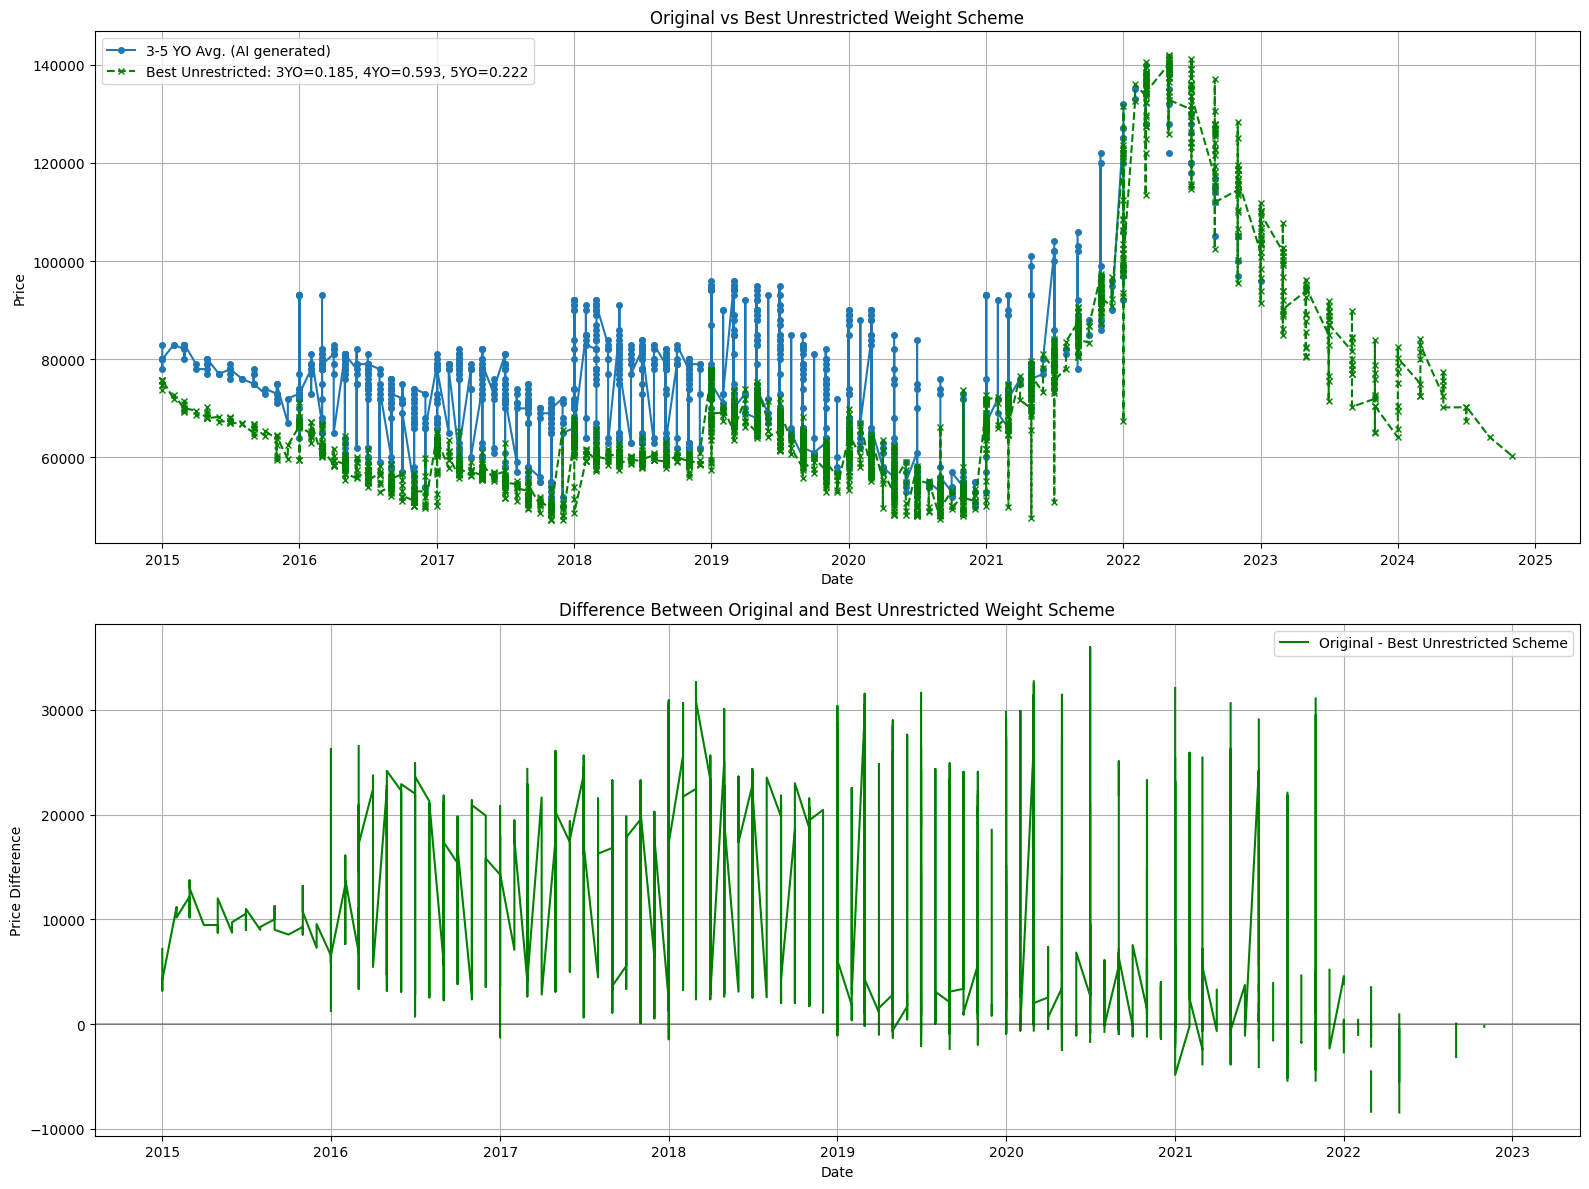

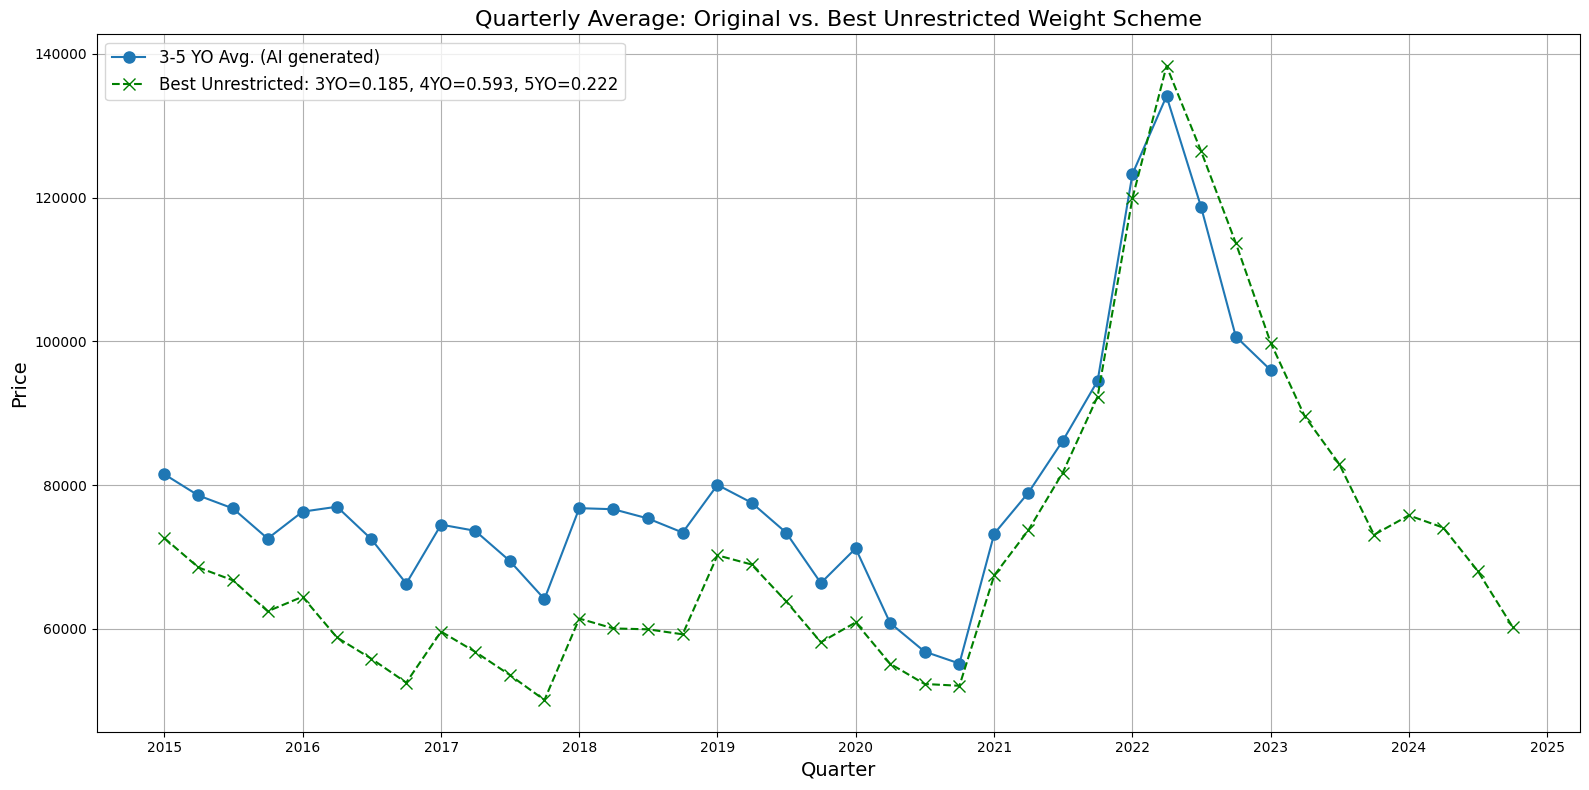


Statistics for Difference between Original and Best Unrestricted Scheme:


count     1546.000000
mean     11562.327675
std       9483.866383
min      -8444.444444
25%       3000.000000
50%      10545.454545
75%      19727.272727
max      36000.000000
Name: Diff Unrestricted, dtype: float64

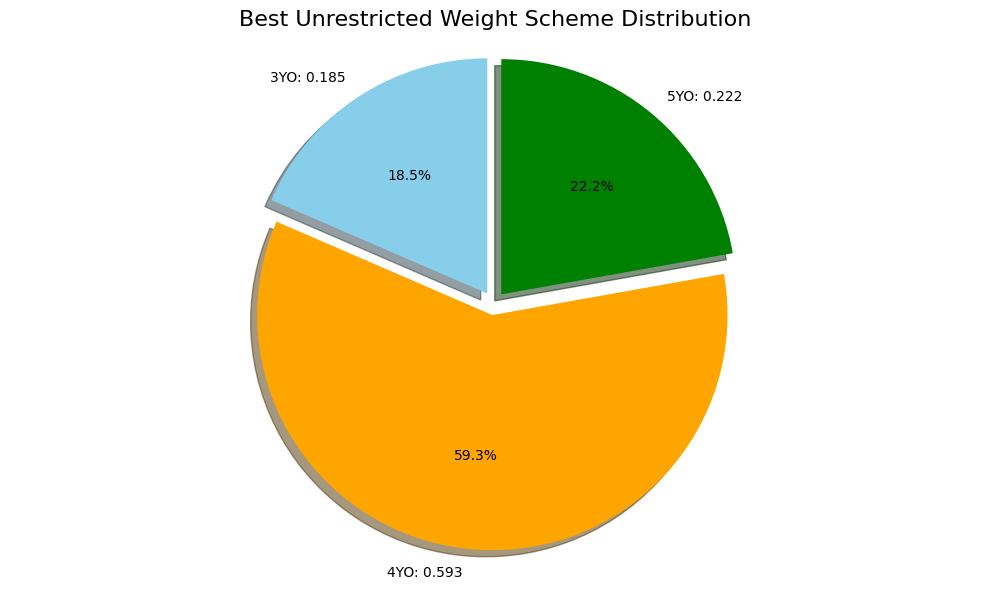

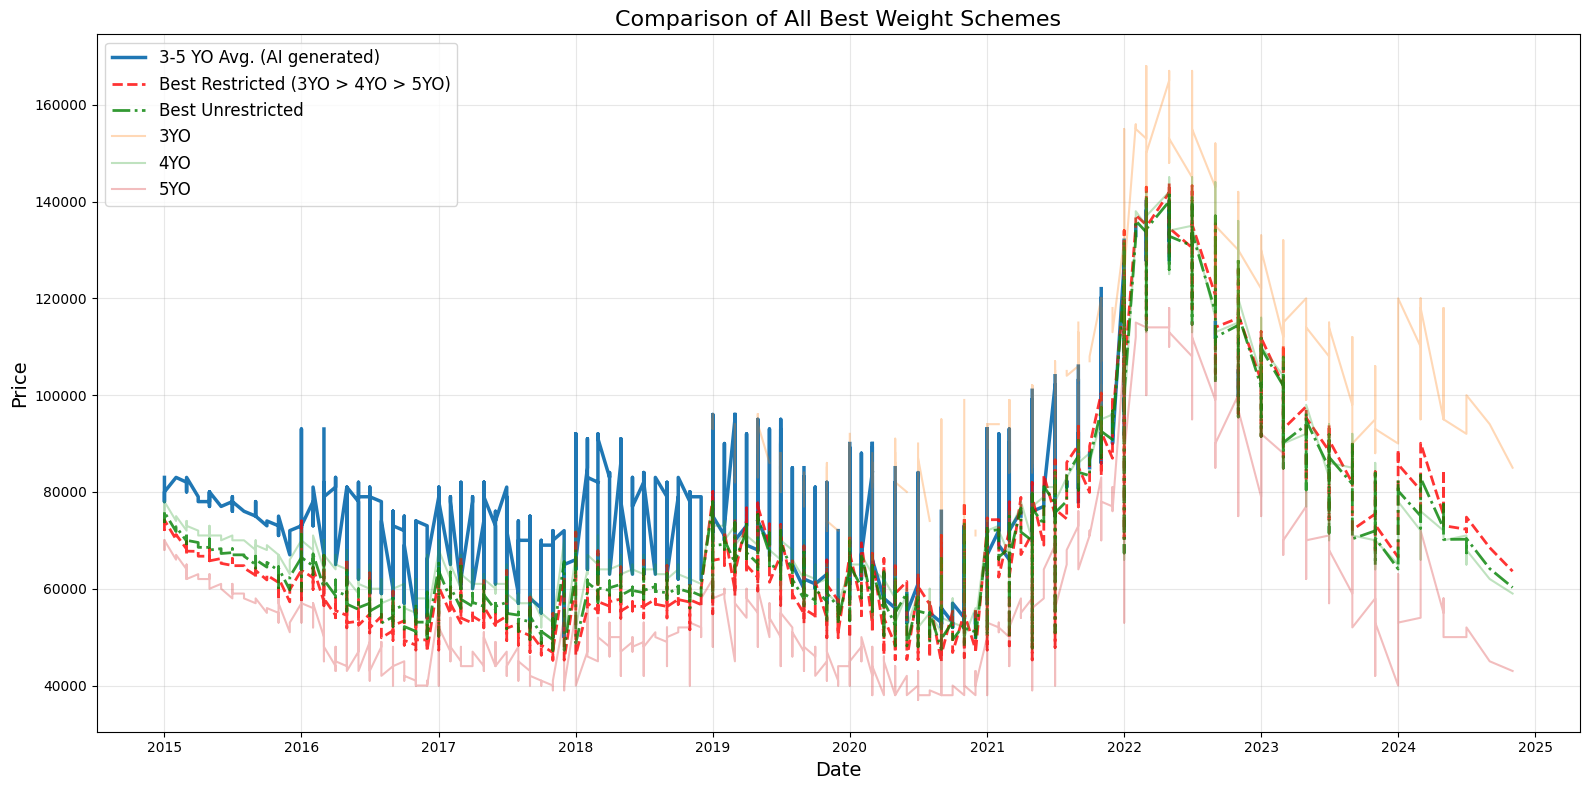


Distribution of ranking patterns in top 50 results:
Pattern shows the rank position of each age group (3YO rank, 4YO rank, 5YO rank)
Example: '123' means 3YO is 1st, 4YO is 2nd, 5YO is 3rd


Ranking Pattern
312    35
213    13
231     2
Name: count, dtype: int64

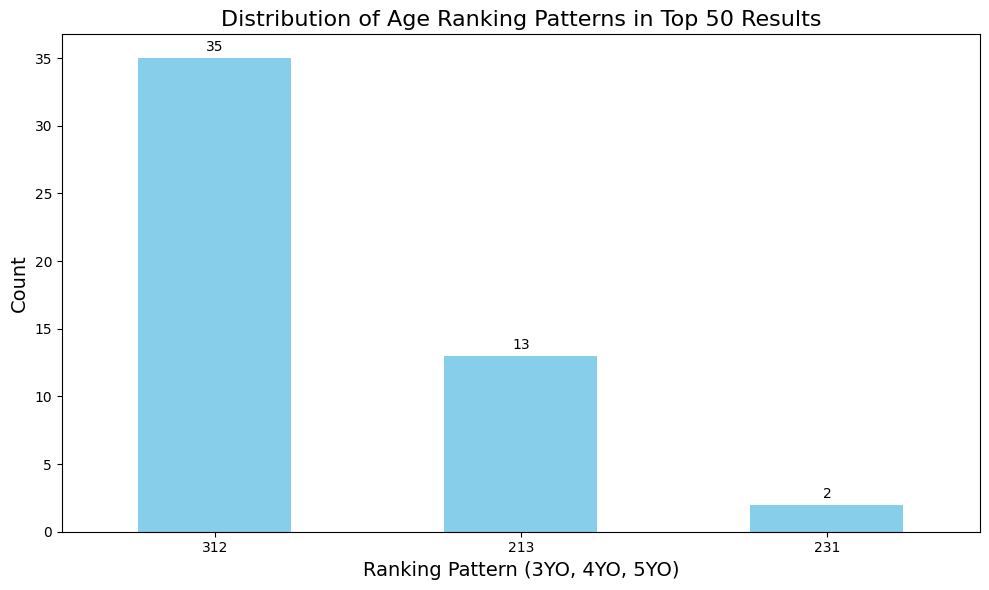


Performance Comparison: Restricted vs Unrestricted Best Schemes


Scheme           MSE           MAE  Correlation  \
0  Restricted (3YO > 4YO > 5YO)  3.047997e+08  14513.671645     0.705886   
1                  Unrestricted  2.235730e+08  11842.220175     0.754957   

  Weights (3YO:4YO:5YO)  Improvement (%)  
0     0.364:0.333:0.303         0.000000  
1     0.185:0.593:0.222        26.649226

In [50]:
# Unrestricted weight analysis - Find the best weight scheme without enforcing 3YO > 4YO > 5YO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define a function to calculate weighted average with different weights
def calculate_weighted_avg(row, weights):
    """Calculate weighted average based on provided weights"""
    values = np.array([row['3YO'], row['4YO'], row['5YO']])
    weights_array = np.array(weights)
    # Check if we have all values
    if not np.isnan(values).any():
        return np.average(values, weights=weights_array)
    # If 3YO is missing but we have 4YO and 5YO
    elif np.isnan(values[0]) and not np.isnan(values[1]) and not np.isnan(values[2]):
        return np.average(values[1:], weights=weights_array[1:] / weights_array[1:].sum())
    # Other cases - return NaN
    else:
        return np.nan

# Only use rows where we have both the original average and all age values
valid_rows = data.dropna(subset=['3YO', '4YO', '5YO', '3-5YO Avg.'])

# Generate weight combinations without the restriction that 3YO > 4YO > 5YO
base_weights = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.5, 4]
unrestricted_combinations = []

# Generate a reasonable number of combinations - sampling to keep computation time manageable
for w1 in base_weights:
    for w2 in base_weights[::2]:  # Take every other value for 4YO to reduce combinations
        for w3 in base_weights[::2]:  # Take every other value for 5YO to reduce combinations
            unrestricted_combinations.append((w1, w2, w3))

print(f"Testing {len(unrestricted_combinations)} unrestricted weight combinations")

# Calculate mean squared error for each weight combination
unrestricted_results = []

for weights in unrestricted_combinations:
    # Calculate weighted average for this weight combination
    valid_rows[f'Weighted {weights}'] = valid_rows.apply(
        lambda row: calculate_weighted_avg(row, weights), axis=1)
    
    # Calculate Mean Squared Error (MSE)
    mse = ((valid_rows['3-5YO Avg.'] - valid_rows[f'Weighted {weights}']) ** 2).mean()
    
    # Calculate Mean Absolute Error (MAE)
    mae = (valid_rows['3-5YO Avg.'] - valid_rows[f'Weighted {weights}']).abs().mean()
    
    # Calculate correlation
    corr = valid_rows['3-5YO Avg.'].corr(valid_rows[f'Weighted {weights}'])
    
    # Calculate normalized weights (weights that sum to 1)
    w_sum = sum(weights)
    norm_weights = tuple(round(w/w_sum, 3) for w in weights)
    
    # Label for age groups
    weights_label = {
        0: '3YO',
        1: '4YO',
        2: '5YO'
    }
    
    # Find rank of each weight (which age has highest weight, which has second, etc.)
    weight_ranks = {weights_label[i]: rank for i, rank in 
                   enumerate(np.argsort(np.argsort(-np.array(weights))) + 1)}
    
    unrestricted_results.append({
        'Weights': weights,
        'Normalized Weights': norm_weights,
        'MSE': mse,
        'MAE': mae,
        'Correlation': corr,
        'Weight String': f'{weights[0]}:{weights[1]}:{weights[2]}',
        'Norm Weight String': f'{norm_weights[0]}:{norm_weights[1]}:{norm_weights[2]}',
        '3YO Rank': weight_ranks['3YO'],
        '4YO Rank': weight_ranks['4YO'],
        '5YO Rank': weight_ranks['5YO'],
        'Ranking Pattern': f"{weight_ranks['3YO']}{weight_ranks['4YO']}{weight_ranks['5YO']}"
    })
    
    # Drop the column to avoid creating too many columns
    valid_rows.drop(columns=[f'Weighted {weights}'], inplace=True)

# Convert results to DataFrame and sort by MSE (lowest first)
unrestricted_df = pd.DataFrame(unrestricted_results).sort_values('MSE')

# Display the top 15 best weight schemes based on MSE
print("\nTop 15 Unrestricted Weight Schemes by Mean Squared Error:")
display(unrestricted_df.head(15))

# Get the best weight combination
best_unrestricted_weights = unrestricted_df.iloc[0]['Weights']
best_unrestricted_norm_weights = unrestricted_df.iloc[0]['Normalized Weights']

print(f"\nBest unrestricted weight scheme: {best_unrestricted_weights[0]}:{best_unrestricted_weights[1]}:{best_unrestricted_weights[2]} (3YO:4YO:5YO)")
print(f"Normalized to 1: {best_unrestricted_norm_weights[0]}:{best_unrestricted_norm_weights[1]}:{best_unrestricted_norm_weights[2]} (3YO:4YO:5YO)")
print(f"Ranking pattern: 3YO is rank {unrestricted_df.iloc[0]['3YO Rank']}, 4YO is rank {unrestricted_df.iloc[0]['4YO Rank']}, 5YO is rank {unrestricted_df.iloc[0]['5YO Rank']}")

# Create a label that clearly identifies which weight belongs to which age
best_unrestricted_label = f"Best Unrestricted: 3YO={best_unrestricted_norm_weights[0]}, 4YO={best_unrestricted_norm_weights[1]}, 5YO={best_unrestricted_norm_weights[2]}"

# Calculate the weighted average with the best unrestricted weight scheme for all data points
data['Best Unrestricted Scheme'] = data.apply(
    lambda row: calculate_weighted_avg(row, best_unrestricted_weights), axis=1)

# Create plots to compare the best unrestricted weight scheme with the original average
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Sort data by date for plotting
data_sorted = data.sort_values('Date')

# First plot - Original vs Best Unrestricted Weight Scheme
axes[0].plot(data_sorted['Date'], data_sorted['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker='o', linestyle='-', markersize=4)
axes[0].plot(data_sorted['Date'], data_sorted['Best Unrestricted Scheme'], 
         label=best_unrestricted_label, marker='x', linestyle='--', markersize=4, color='green')
axes[0].set_title('Original vs Best Unrestricted Weight Scheme')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].grid(True)
axes[0].legend()

# Second plot - Difference between original and best unrestricted weight scheme
data_sorted['Diff Unrestricted'] = data_sorted['3-5YO Avg.'] - data_sorted['Best Unrestricted Scheme']
axes[1].plot(data_sorted['Date'], data_sorted['Diff Unrestricted'], label=f'Original - Best Unrestricted Scheme', color='green')
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1].set_title('Difference Between Original and Best Unrestricted Weight Scheme')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price Difference')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

# Create a quarterly view
# Group by quarter and calculate mean for each column of interest
data['Quarter'] = data['Date'].dt.to_period('Q')
quarterly_data = data.groupby('Quarter').agg({
    '3-5YO Avg.': 'mean',
    'Best Unrestricted Scheme': 'mean'
}).reset_index()

# Convert Period to datetime for plotting
quarterly_data['Date'] = quarterly_data['Quarter'].dt.to_timestamp()

# Plot the quarterly data
plt.figure(figsize=(16, 8))
plt.plot(quarterly_data['Date'], quarterly_data['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker='o', linestyle='-', markersize=8)
plt.plot(quarterly_data['Date'], quarterly_data['Best Unrestricted Scheme'], 
         label=best_unrestricted_label, marker='x', linestyle='--', markersize=8, color='green')
plt.title('Quarterly Average: Original vs. Best Unrestricted Weight Scheme', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Calculate statistics for the difference
unrestricted_diff_stats = data_sorted['Diff Unrestricted'].describe()

print(f"\nStatistics for Difference between Original and Best Unrestricted Scheme:")
display(unrestricted_diff_stats)

# Create a pie chart for the best unrestricted weight scheme
plt.figure(figsize=(10, 6))
plt.pie([best_unrestricted_norm_weights[0], best_unrestricted_norm_weights[1], best_unrestricted_norm_weights[2]], 
        labels=[f'3YO: {best_unrestricted_norm_weights[0]:.3f}', 
                f'4YO: {best_unrestricted_norm_weights[1]:.3f}', 
                f'5YO: {best_unrestricted_norm_weights[2]:.3f}'],
        autopct='%1.1f%%',
        colors=['skyblue', 'orange', 'green'],
        explode=(0.05, 0.05, 0.05),
        shadow=True,
        startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Best Unrestricted Weight Scheme Distribution', fontsize=16)
plt.tight_layout()
plt.show()

# Add comparison with the restricted best scheme
plt.figure(figsize=(16, 8))
plt.plot(data_sorted['Date'], data_sorted['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker=None, linestyle='-', linewidth=2.5)
plt.plot(data_sorted['Date'], data_sorted['Best Weight Scheme'], 
         label=f'Best Restricted (3YO > 4YO > 5YO)', marker=None, linestyle='--', linewidth=2, color='red', alpha=0.8)
plt.plot(data_sorted['Date'], data_sorted['Best Unrestricted Scheme'], 
         label=f'Best Unrestricted', marker=None, linestyle='-.', linewidth=2, color='green', alpha=0.8)
plt.plot(data_sorted['Date'], data_sorted['3YO'], 
         label='3YO', marker=None, linestyle='-', alpha=0.3)
plt.plot(data_sorted['Date'], data_sorted['4YO'], 
         label='4YO', marker=None, linestyle='-', alpha=0.3)
plt.plot(data_sorted['Date'], data_sorted['5YO'], 
         label='5YO', marker=None, linestyle='-', alpha=0.3)
plt.title('Comparison of All Best Weight Schemes', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Analyze ranking patterns in the top results
pattern_counts = unrestricted_df.head(50)['Ranking Pattern'].value_counts()
print("\nDistribution of ranking patterns in top 50 results:")
print("Pattern shows the rank position of each age group (3YO rank, 4YO rank, 5YO rank)")
print("Example: '123' means 3YO is 1st, 4YO is 2nd, 5YO is 3rd")
display(pattern_counts)

# Create a bar chart of the top patterns
plt.figure(figsize=(10, 6))
pattern_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Ranking Patterns in Top 50 Results', fontsize=16)
plt.xlabel('Ranking Pattern (3YO, 4YO, 5YO)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
for i, v in enumerate(pattern_counts):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.tight_layout()
plt.show()

# Compare performance metrics of the restricted vs unrestricted best schemes
print("\nPerformance Comparison: Restricted vs Unrestricted Best Schemes")
valid_for_comparison = data.dropna(subset=['3-5YO Avg.', 'Best Weight Scheme', 'Best Unrestricted Scheme'])

restricted_mse = ((valid_for_comparison['3-5YO Avg.'] - valid_for_comparison['Best Weight Scheme']) ** 2).mean()
unrestricted_mse = ((valid_for_comparison['3-5YO Avg.'] - valid_for_comparison['Best Unrestricted Scheme']) ** 2).mean()

restricted_mae = (valid_for_comparison['3-5YO Avg.'] - valid_for_comparison['Best Weight Scheme']).abs().mean()
unrestricted_mae = (valid_for_comparison['3-5YO Avg.'] - valid_for_comparison['Best Unrestricted Scheme']).abs().mean()

restricted_corr = valid_for_comparison['3-5YO Avg.'].corr(valid_for_comparison['Best Weight Scheme'])
unrestricted_corr = valid_for_comparison['3-5YO Avg.'].corr(valid_for_comparison['Best Unrestricted Scheme'])

comparison_df = pd.DataFrame({
    'Scheme': ['Restricted (3YO > 4YO > 5YO)', 'Unrestricted'],
    'MSE': [restricted_mse, unrestricted_mse],
    'MAE': [restricted_mae, unrestricted_mae],
    'Correlation': [restricted_corr, unrestricted_corr],
    'Weights (3YO:4YO:5YO)': [
        f"{best_norm_weights[0]:.3f}:{best_norm_weights[1]:.3f}:{best_norm_weights[2]:.3f}",
        f"{best_unrestricted_norm_weights[0]:.3f}:{best_unrestricted_norm_weights[1]:.3f}:{best_unrestricted_norm_weights[2]:.3f}"
    ],
    'Improvement (%)': [0, (restricted_mse - unrestricted_mse) / restricted_mse * 100]
})

display(comparison_df)

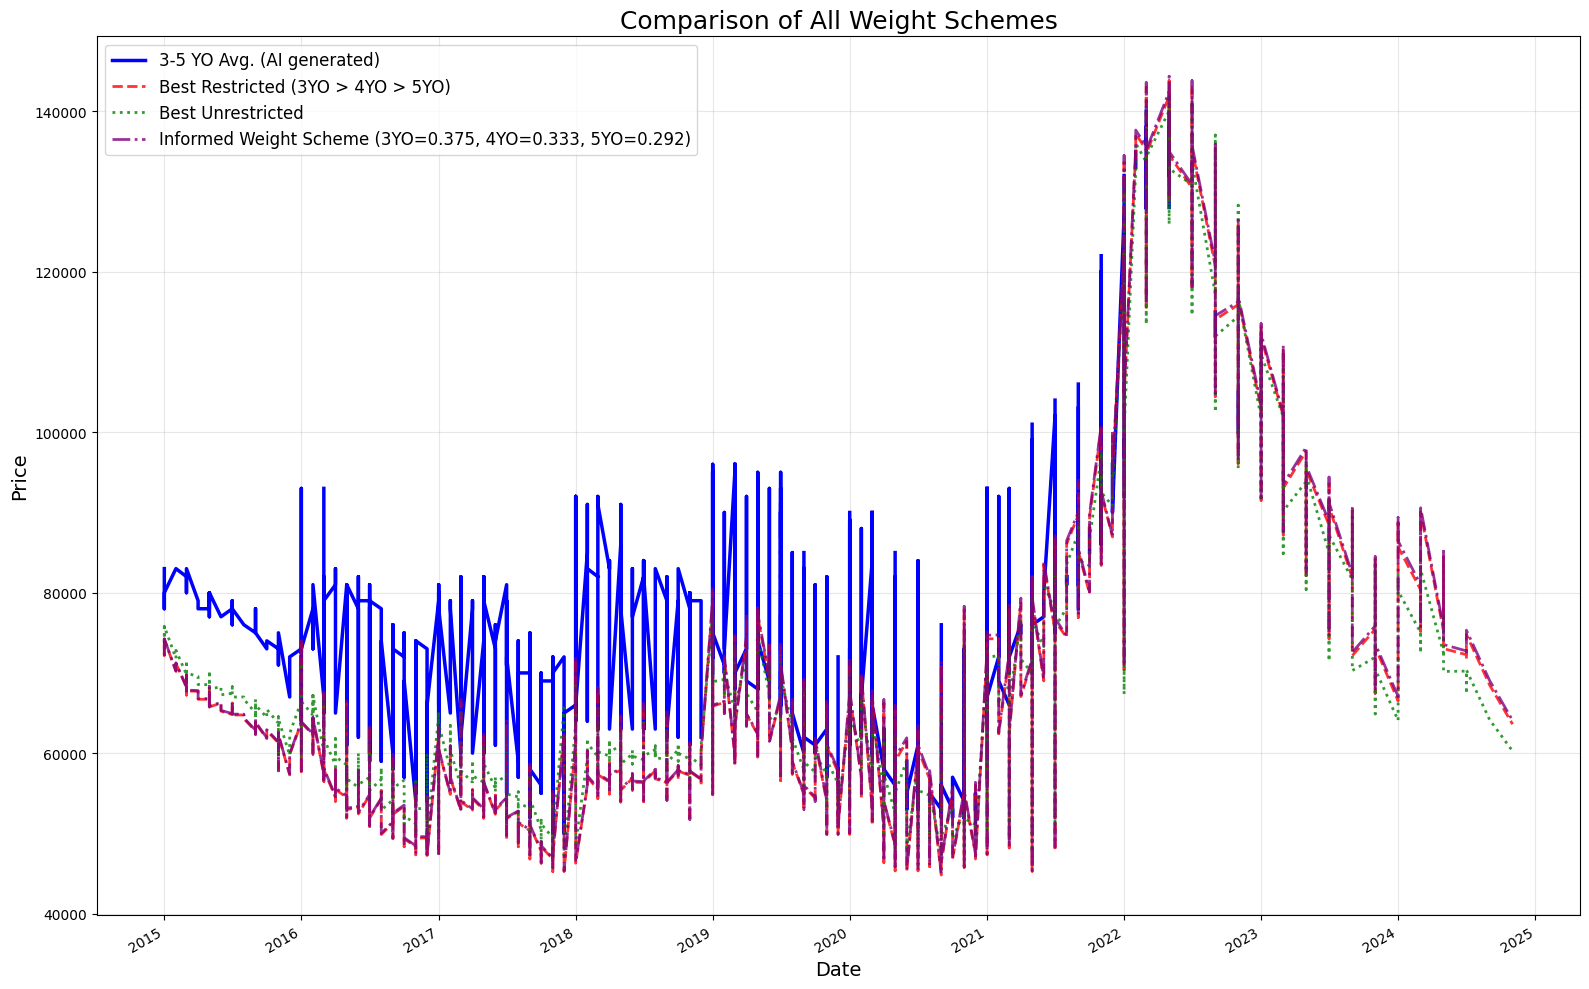


Performance Comparison of All Weight Schemes


Scheme           MSE           MAE  \
1                                Unrestricted  2.235730e+08  11842.220175   
2  Informed (3YO=0.375, 4YO=0.333, 5YO=0.292)  3.011995e+08  14460.731822   
0                Restricted (3YO > 4YO > 5YO)  3.047997e+08  14513.671645   

   Correlation  MSE Relative  MAE Relative  
1     0.754957    100.000000    100.000000  
2     0.703793     74.227534     81.892261  
0     0.705886     73.350774     81.593552

In [51]:
# Comprehensive comparison of all weight schemes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sort data by date for plotting
data_sorted = data.sort_values('Date')

# Create a comprehensive comparison chart of all schemes
plt.figure(figsize=(16, 10))

# Plot all schemes with meaningful labels and styling
plt.plot(data_sorted['Date'], data_sorted['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker=None, linestyle='-', linewidth=2.5, color='blue')
         
plt.plot(data_sorted['Date'], data_sorted['Best Weight Scheme'], 
         label='Best Restricted (3YO > 4YO > 5YO)', marker=None, linestyle='--', linewidth=2, color='red', alpha=0.8)
         
plt.plot(data_sorted['Date'], data_sorted['Best Unrestricted Scheme'], 
         label='Best Unrestricted', marker=None, linestyle=':', linewidth=2, color='green', alpha=0.8)
         
plt.plot(data_sorted['Date'], data_sorted['Informed Weight Scheme'], 
         label='Informed Weight Scheme (3YO=0.375, 4YO=0.333, 5YO=0.292)', marker=None, linestyle='-.', linewidth=2, color='purple', alpha=0.8)

# Add chart styling
plt.title('Comparison of All Weight Schemes', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='best')

# Improve x-axis date formatting
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# Create a performance comparison table for all schemes
print("\nPerformance Comparison of All Weight Schemes")
valid_for_comparison = data.dropna(subset=['3-5YO Avg.', 'Best Weight Scheme', 'Best Unrestricted Scheme', 'Informed Weight Scheme'])

# Calculate error metrics for each scheme
restricted_mse = ((valid_for_comparison['3-5YO Avg.'] - valid_for_comparison['Best Weight Scheme']) ** 2).mean()
unrestricted_mse = ((valid_for_comparison['3-5YO Avg.'] - valid_for_comparison['Best Unrestricted Scheme']) ** 2).mean()
informed_mse = ((valid_for_comparison['3-5YO Avg.'] - valid_for_comparison['Informed Weight Scheme']) ** 2).mean()

restricted_mae = (valid_for_comparison['3-5YO Avg.'] - valid_for_comparison['Best Weight Scheme']).abs().mean()
unrestricted_mae = (valid_for_comparison['3-5YO Avg.'] - valid_for_comparison['Best Unrestricted Scheme']).abs().mean()
informed_mae = (valid_for_comparison['3-5YO Avg.'] - valid_for_comparison['Informed Weight Scheme']).abs().mean()

restricted_corr = valid_for_comparison['3-5YO Avg.'].corr(valid_for_comparison['Best Weight Scheme'])
unrestricted_corr = valid_for_comparison['3-5YO Avg.'].corr(valid_for_comparison['Best Unrestricted Scheme'])
informed_corr = valid_for_comparison['3-5YO Avg.'].corr(valid_for_comparison['Informed Weight Scheme'])

# Create a comprehensive comparison dataframe
comparison_df = pd.DataFrame({
    'Scheme': [
        'Restricted (3YO > 4YO > 5YO)', 
        'Unrestricted', 
        'Informed (3YO=0.375, 4YO=0.333, 5YO=0.292)'
    ],
    'MSE': [restricted_mse, unrestricted_mse, informed_mse],
    'MAE': [restricted_mae, unrestricted_mae, informed_mae],
    'Correlation': [restricted_corr, unrestricted_corr, informed_corr],
})

# Add relative performance metrics (best = 100%)
best_mse = comparison_df['MSE'].min()
best_mae = comparison_df['MAE'].min()
comparison_df['MSE Relative'] = best_mse / comparison_df['MSE'] * 100
comparison_df['MAE Relative'] = best_mae / comparison_df['MAE'] * 100

# Display the results sorted by MSE (best first)
display(comparison_df.sort_values('MSE'))